<a href="https://colab.research.google.com/github/utsavdatta-git/Multi-Layer-NN/blob/master/AttnGAN_%2B_i_CLEVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AttnGAN: Fine-Grained Text to Image Generation with Attentional Generative Adversarial Networks
## by Tao Xu, Pengchuan Zhang, Qiuyuan Huang, Han Zhang, Zhe Gan, Xiaolei Huang, Xiaodong He. 
To run this notebook, please run all cells in sequence up to **DAMSM Trainer and Execution Code** section

Then choose config_id and trainer (DAMSM or GAN)

DAMSM trainer trains DAMSM, text encoder and image encoder. These are used to train GAN network. pretrained models are included in the download section too.

GAN trainer trains GAN networks. pretrained models are included too.

For paper, refer to https://arxiv.org/abs/1711.10485

For orginial code, refer to https://github.com/taoxugit/AttnGAN

#Prerequisites


##Installing dependancies

In [0]:
!pip install torchfile

  Created wheel for torchfile: filename=torchfile-0.1.0-cp27-none-any.whl size=5713 sha256=4c16861a87accea2ac821c7bbfe1049f970dcfa662f2e8c98ecf5351b6bb36fd
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built torchfile


##Downloading AttnGAN code

In [0]:
!pip install PyDrive

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Downloading code from google drive
file_id = '1X5f3LQyCLYBLsVIA8BZYeSZ7d0xATAH1' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('AttnGAN-master.zip')

In [0]:
!unzip '/content/AttnGAN-master.zip'

##Downloading and replacing old code with fixed code

In [0]:
# Downloading code from google drive
file_ids = [('1eEfz8h5ijlfxCUYCLuH0FgtYCTmyUQia', 'Arial.ttf'),
           ('1Q9ctTixmSyAa8234LxK1FtltCw4QTPAy', 'utils.py'),
           ('1Oy7pEJCgfOK5IuB0I60QyJoN7IK4KHas', 'trainer.py'),
           ('17DaBW76QkEFr1ZDB4OYheSxdqn5zxBVm', 'main.py'),
           ('17G_vvNrPM79pafbWOkqWL3KKgd8MgC-1', 'losses.py'),
           ('1n6Zb5gMFU8g5GQgpn4VZl2koVWoNXqAU', 'bird_attn2_2G.yml')] # URL id.
for file_id, file_name in file_ids:
    downloaded = drive.CreateFile({'id': file_id})
    downloaded.GetContentFile(file_name)

In [0]:
!mv /content/main.py /content/AttnGAN-master/code/
!mv /content/trainer.py /content/AttnGAN-master/code/
!mv /content/utils.py /content/AttnGAN-master/code/miscc/
!mv /content/losses.py /content/AttnGAN-master/code/miscc/
!mv /content/bird_attn2_2G.yml /content/AttnGAN-master/code/cfg/

##Setting working directory

In [0]:
import os
import os
os.chdir('/content/AttnGAN-master/code')

# Download GeNeVA dataset (Not required for CUB birds dataset)

use copy this [folder](https://drive.google.com/drive/folders/1Qy2kuP3i4EEoPdHSDhjHcdaRJZxfR2Ah?usp=sharing) to your google drive

## Prepare files for DAMSM training

In [0]:
#!wget https://download.microsoft.com/download/6/D/0/6D074C80-78C0-4976-AB33-880BFA571F3C/GeNeVA-v1.zip

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unrar x -idq "/content/drive/My Drive/i-CLEVR/i-CLEVR.rar" /content/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/i-CLEVR.yml" /content/AttnGAN-master/code/cfg/DAMSM

In [0]:
!mkdir /content/AttnGAN-master/data/i-CLEVR
!mkdir /content/AttnGAN-master/data/i-CLEVR/train
!mkdir /content/AttnGAN-master/data/i-CLEVR/test
!mkdir /content/AttnGAN-master/data/i-CLEVR/text
!mkdir /content/AttnGAN-master/data/i-CLEVR/images
!mkdir /content/AttnGAN-master/data/i-CLEVR/CUB_200_2011
!mkdir /content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images

In [0]:
# Copy train samples
!for f in /content/i-CLEVR/images/CLEVR_train_*_1.png; do cp "$f" /content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images/;done

In [0]:
# Copy val samples
!for f in /content/i-CLEVR/images/CLEVR_val_*_1.png; do cp "$f" /content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images/;done

In [0]:
# Create images.txt
import os


files = sorted(os.listdir("/content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images/"))
with open('/content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images.txt', "w") as image_files:
  for i, file in enumerate(files):
    image_files.write(str(i) + ' ' + file + '\n')

In [0]:
!mkdir /content/i-CLEVR/pre-text

In [0]:
import os

files = sorted(os.listdir("/content/i-CLEVR/text/"))
for file in files:
  with open("/content/i-CLEVR/text/" + file, 'r') as read_f:
    with open('/content/i-CLEVR/pre-text/'+file,'w') as write_f:
      caption = read_f.readline().rstrip('\n') + '. ' + read_f.readline()
      write_f.write(caption)

In [0]:
# Copy 100 train samples
!for f in /content/i-CLEVR/pre-text/CLEVR_train_*.txt; do cp "$f" /content/AttnGAN-master/data/i-CLEVR/text/ ;done

In [0]:
# Copy 10 test samples
!for f in /content/i-CLEVR/pre-text/CLEVR_val_*.txt; do cp "$f" /content/AttnGAN-master/data/i-CLEVR/text/ ;done

In [0]:
import pickle
train_samples = 6003
test_samples = 2000


files = sorted(os.listdir("/content/AttnGAN-master/data/i-CLEVR/text/"))
for i in range(len(files[:train_samples])):
  files[i] = files[i][:-4]
with open("/content/AttnGAN-master/data/i-CLEVR/train/filenames.pickle", "w") as pickle_captions:
  pickle.dump(files[:train_samples], pickle_captions)

In [0]:
files = sorted(os.listdir("/content/AttnGAN-master/data/i-CLEVR/text/"))
for i in range(len(files[train_samples:])):
  files[train_samples + i] = files[train_samples + i][:-4]
with open("/content/AttnGAN-master/data/i-CLEVR/test/filenames.pickle", "w") as pickle_captions:
  pickle.dump(files[train_samples:], pickle_captions)

In [0]:
!cp -r /content/AttnGAN-master/data/i-CLEVR/CUB_200_2011/images/. /content/AttnGAN-master/data/i-CLEVR/images

## Prepare files for GAN training

In [0]:
!mkdir /content/AttnGAN-master/DAMSMencoders/i-CLEVR

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/image_encoder150.pth" /content/AttnGAN-master/DAMSMencoders/i-CLEVR/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/text_encoder150.pth" /content/AttnGAN-master/DAMSMencoders/i-CLEVR/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/i-CLEVR_attn2.yml" /content/AttnGAN-master/code/cfg/

In [0]:
!mv /content/AttnGAN-master/DAMSMencoders/i-CLEVR/image_encoder150.pth /content/AttnGAN-master/DAMSMencoders/i-CLEVR/image_encoder0.pth
!mv /content/AttnGAN-master/DAMSMencoders/i-CLEVR/text_encoder150.pth /content/AttnGAN-master/DAMSMencoders/i-CLEVR/text_encoder0.pth

## Prepare files for evaluation

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/netG_epoch_25.pth" /content/AttnGAN-master/models/
!cp "/content/drive/My Drive/i-CLEVR/netG_epoch_100.pth" /content/AttnGAN-master/models/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/eval_i-CLEVR.yml" /content/AttnGAN-master/code/cfg/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/eval_i-CLEVR3.yml" /content/AttnGAN-master/code/cfg/

In [0]:
!cp "/content/drive/My Drive/i-CLEVR/example_filenames.txt" /content/AttnGAN-master/data/i-CLEVR/
!cp "/content/drive/My Drive/i-CLEVR/example_captions.txt" /content/AttnGAN-master/data/i-CLEVR/

# AttnGAN network

## Text Encoder

![Text Encoder](https://drive.google.com/uc?export=view&id=1h83RYN75LVqbTIHWQ-UA_99As1DmepFP)

***Overview:*** It is a bi-directional Long Short-Term Memory (LSTM) that extracts semantic vectors from the text description. In the bi-directional LSTM, each word corresponds to two hidden states, one for each direction. Thus, we concatenate its two hidden states to represent the semantic meaning of a word. Meanwhile, the last hidden states of the bi-directional LSTM are concatenated to be the global sentence vector. Code for using GRU instead of LSTM is also included

***Class Name:*** RNN_ENCODER

***Constructor Input:***

size of the dictionary (ntoken)

size of each embedding vector (ninput)

drop out probability (drop_prob)

Number of recurrent layers (nlayers)

Number of hidden nodes (nhidden)

***Returns:*** Word (words_emb) and Sentence embedding (sent_emb) matrices

***Used in:*** condGANTrainer.build_models() and build_models method of pretrain_DAMSM


In [0]:
import torch
import torch.nn as nn
import torch.nn.parallel
from torch.autograd import Variable
from torchvision import models
import torch.utils.model_zoo as model_zoo
import torch.nn.functional as F

from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

from miscc.config import cfg
#from GlobalAttention import GlobalAttentionGeneral as ATT_NET
from model import GLU, conv1x1, conv3x3, upBlock, Block3x3_relu, ResBlock, Block3x3_leakRelu, Block3x3_leakRelu, encode_image_by_16times

# ############## Text2Image Encoder-Decoder #######
class RNN_ENCODER(nn.Module):
    def __init__(self, ntoken, ninput=300, drop_prob=0.5,
                 nhidden=128, nlayers=1, bidirectional=True):
        super(RNN_ENCODER, self).__init__()
        self.n_steps = cfg.TEXT.WORDS_NUM
        self.ntoken = ntoken  # size of the dictionary
        self.ninput = ninput  # size of each embedding vector
        self.drop_prob = drop_prob  # probability of an element to be zeroed
        self.nlayers = nlayers  # Number of recurrent layers
        self.bidirectional = bidirectional
        self.rnn_type = cfg.RNN_TYPE
        if bidirectional:
            self.num_directions = 2
        else:
            self.num_directions = 1
        # number of features in the hidden state
        self.nhidden = nhidden // self.num_directions

        self.define_module()
        self.init_weights()

    def define_module(self):
        self.encoder = nn.Embedding(self.ntoken, self.ninput)
        self.drop = nn.Dropout(self.drop_prob)
        if self.rnn_type == 'LSTM':
            # dropout: If non-zero, introduces a dropout layer on
            # the outputs of each RNN layer except the last layer
            self.rnn = nn.LSTM(self.ninput, self.nhidden,
                               self.nlayers, batch_first=True,
                               dropout=self.drop_prob,
                               bidirectional=self.bidirectional)
        elif self.rnn_type == 'GRU':
            self.rnn = nn.GRU(self.ninput, self.nhidden,
                              self.nlayers, batch_first=True,
                              dropout=self.drop_prob,
                              bidirectional=self.bidirectional)
        else:
            raise NotImplementedError

    def init_weights(self):
        initrange = 0.1
        self.encoder.weight.data.uniform_(-initrange, initrange)
        # Do not need to initialize RNN parameters, which have been initialized
        # http://pytorch.org/docs/master/_modules/torch/nn/modules/rnn.html#LSTM
        # self.decoder.weight.data.uniform_(-initrange, initrange)
        # self.decoder.bias.data.fill_(0)

    def init_hidden(self, bsz):
        weight = next(self.parameters()).data
        if self.rnn_type == 'LSTM':
            return (Variable(weight.new(self.nlayers * self.num_directions,
                                        bsz, self.nhidden).zero_()),
                    Variable(weight.new(self.nlayers * self.num_directions,
                                        bsz, self.nhidden).zero_()))
        else:
            return Variable(weight.new(self.nlayers * self.num_directions,
                                       bsz, self.nhidden).zero_())

    def forward(self, captions, cap_lens, hidden, mask=None):
        # input: torch.LongTensor of size batch x n_steps
        # --> emb: batch x n_steps x ninput
        emb = self.drop(self.encoder(captions))
        #
        # Returns: a PackedSequence object
        cap_lens = cap_lens.data.tolist()
        emb = pack_padded_sequence(emb, cap_lens, batch_first=True)
        # #hidden and memory (num_layers * num_directions, batch, hidden_size):
        # tensor containing the initial hidden state for each element in batch.
        # #output (batch, seq_len, hidden_size * num_directions)
        # #or a PackedSequence object:
        # tensor containing output features (h_t) from the last layer of RNN
        output, hidden = self.rnn(emb, hidden)
        # PackedSequence object
        # --> (batch, seq_len, hidden_size * num_directions)
        output = pad_packed_sequence(output, batch_first=True)[0]
        # output = self.drop(output)
        # --> batch x hidden_size*num_directions x seq_len
        words_emb = output.transpose(1, 2)
        # --> batch x num_directions*hidden_size
        if self.rnn_type == 'LSTM':
            sent_emb = hidden[0].transpose(0, 1).contiguous()
        else:
            sent_emb = hidden.transpose(0, 1).contiguous()
        sent_emb = sent_emb.view(-1, self.nhidden * self.num_directions)
        return words_emb, sent_emb

## Image Encoder

![Image Encoder](https://drive.google.com/uc?id=17CVwivPk0s_3LX8ibuSWYYTEtSaeZWOu)

***Overview:*** It is a Convolutional Neural Network
(CNN) that maps images to semantic vectors. The inter-
mediate layers of the CNN learn local features of different
sub-regions of the image, while the later layers learn global
features of the image.

***Class Name:*** CNN_ENCODER

***Constructor Input:*** Number of hidden nodes (nhidden)

***Returns:*** local feature vector (features), number of sub-regions in the image (cnn_code)

***Used in:*** condGANTrainer.build_models() and build_models method of pretrain_DAMSM


In [0]:
class CNN_ENCODER(nn.Module):
    def __init__(self, nef):
        super(CNN_ENCODER, self).__init__()
        if cfg.TRAIN.FLAG:
            self.nef = nef
        else:
            self.nef = 256  # define a uniform ranker

        model = models.inception_v3()
        url = 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth'
        model.load_state_dict(model_zoo.load_url(url))
        for param in model.parameters():
            param.requires_grad = False
        print('Load pretrained model from ', url)
        # print(model)

        self.define_module(model)
        self.init_trainable_weights()

    def define_module(self, model):
        self.Conv2d_1a_3x3 = model.Conv2d_1a_3x3
        self.Conv2d_2a_3x3 = model.Conv2d_2a_3x3
        self.Conv2d_2b_3x3 = model.Conv2d_2b_3x3
        self.Conv2d_3b_1x1 = model.Conv2d_3b_1x1
        self.Conv2d_4a_3x3 = model.Conv2d_4a_3x3
        self.Mixed_5b = model.Mixed_5b
        self.Mixed_5c = model.Mixed_5c
        self.Mixed_5d = model.Mixed_5d
        self.Mixed_6a = model.Mixed_6a
        self.Mixed_6b = model.Mixed_6b
        self.Mixed_6c = model.Mixed_6c
        self.Mixed_6d = model.Mixed_6d
        self.Mixed_6e = model.Mixed_6e
        self.Mixed_7a = model.Mixed_7a
        self.Mixed_7b = model.Mixed_7b
        self.Mixed_7c = model.Mixed_7c

        self.emb_features = conv1x1(768, self.nef)
        self.emb_cnn_code = nn.Linear(2048, self.nef)

    def init_trainable_weights(self):
        initrange = 0.1
        self.emb_features.weight.data.uniform_(-initrange, initrange)
        self.emb_cnn_code.weight.data.uniform_(-initrange, initrange)

    def forward(self, x):
        features = None
        # --> fixed-size input: batch x 3 x 299 x 299
        x = nn.Upsample(size=(299, 299), mode='bilinear')(x)
        # 299 x 299 x 3
        x = self.Conv2d_1a_3x3(x)
        # 149 x 149 x 32
        x = self.Conv2d_2a_3x3(x)
        # 147 x 147 x 32
        x = self.Conv2d_2b_3x3(x)
        # 147 x 147 x 64
        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 73 x 73 x 64
        x = self.Conv2d_3b_1x1(x)
        # 73 x 73 x 80
        x = self.Conv2d_4a_3x3(x)
        # 71 x 71 x 192

        x = F.max_pool2d(x, kernel_size=3, stride=2)
        # 35 x 35 x 192
        x = self.Mixed_5b(x)
        # 35 x 35 x 256
        x = self.Mixed_5c(x)
        # 35 x 35 x 288
        x = self.Mixed_5d(x)
        # 35 x 35 x 288

        x = self.Mixed_6a(x)
        # 17 x 17 x 768
        x = self.Mixed_6b(x)
        # 17 x 17 x 768
        x = self.Mixed_6c(x)
        # 17 x 17 x 768
        x = self.Mixed_6d(x)
        # 17 x 17 x 768
        x = self.Mixed_6e(x)
        # 17 x 17 x 768

        # image region features
        features = x
        # 17 x 17 x 768

        x = self.Mixed_7a(x)
        # 8 x 8 x 1280
        x = self.Mixed_7b(x)
        # 8 x 8 x 2048
        x = self.Mixed_7c(x)
        # 8 x 8 x 2048
        x = F.avg_pool2d(x, kernel_size=8)
        # 1 x 1 x 2048
        # x = F.dropout(x, training=self.training)
        # 1 x 1 x 2048
        x = x.view(x.size(0), -1)
        # 2048

        # global image features
        cnn_code = self.emb_cnn_code(x)
        # 512
        if features is not None:
            features = self.emb_features(features)
        return features, cnn_code

## Conditioning Augumentation Network

![Conditioning Augumentation](https://drive.google.com/uc?id=1qF5IK5LroK5YCLfU7gQetEM3Cx5VAR9G)

***Overview:*** Represented by Fca, this is the Conditioning
Augmentation that converts the sentence vector e to the
conditioning vector

***Class Name:*** CA_NET

***Constructor Input:*** Sentence embedding

***Returns:*** Condtioning vector (c_code), mean (mu), log of variance (logvar)

***Used in:*** condGANTrainer.build_models() and build_models method of pretrain_DAMSM

In [0]:
class CA_NET(nn.Module):
    # some code is modified from vae examples
    # (https://github.com/pytorch/examples/blob/master/vae/main.py)
    def __init__(self):
        super(CA_NET, self).__init__()
        self.t_dim = cfg.TEXT.EMBEDDING_DIM
        self.c_dim = cfg.GAN.CONDITION_DIM
        self.fc = nn.Linear(self.t_dim, self.c_dim * 4, bias=True)
        self.relu = GLU()

    def encode(self, text_embedding):
        x = self.relu(self.fc(text_embedding))
        mu = x[:, :self.c_dim]
        logvar = x[:, self.c_dim:]
        return mu, logvar

    def reparametrize(self, mu, logvar):
        std = logvar.mul(0.5).exp_()
        if cfg.CUDA:
            eps = torch.cuda.FloatTensor(std.size()).normal_()
        else:
            eps = torch.FloatTensor(std.size()).normal_()
        eps = Variable(eps)
        return eps.mul(std).add_(mu)

    def forward(self, text_embedding):
        mu, logvar = self.encode(text_embedding)
        c_code = self.reparametrize(mu, logvar)
        return c_code, mu, logvar

## Initial stage upsampling and generator network

![Initial Generator](https://drive.google.com/uc?id=18XBAeujP3ekMT0NclaviCYGi0JIdRuTS)

***Overview:*** Represented by F0 and G0. As per the norm for GANs, the conditioning vector is concatenated with a noise vector (sampled from a Gaussian distribution (z~N(0,1)) and fed into the first Generator network (F0) F0 is responsible for doing most of the up-sampling in the image generation and does not use any word level features (only uses sentence embeddings). G0 takes the output from F0 and produces the first set of fake images of size 64X64


***Class Name:*** INIT_STAGE_G

***Constructor Input:*** latent space vector concatenated with conditioned vector (ngf, ncf)

***Returns:*** 64X64 initial image features (out_code64)

***Used in:*** class G_NET (which is used for creating the overall connected Generator Networks)

In [0]:
# ############## G networks ###################
class INIT_STAGE_G(nn.Module):
    def __init__(self, ngf, ncf):
        super(INIT_STAGE_G, self).__init__()
        self.gf_dim = ngf
        self.in_dim = cfg.GAN.Z_DIM + ncf  # cfg.TEXT.EMBEDDING_DIM

        self.define_module()

    def define_module(self):
        nz, ngf = self.in_dim, self.gf_dim
        self.fc = nn.Sequential(
            nn.Linear(nz, ngf * 4 * 4 * 2, bias=False),
            nn.BatchNorm1d(ngf * 4 * 4 * 2),
            GLU())

        self.upsample1 = upBlock(ngf, ngf // 2)
        self.upsample2 = upBlock(ngf // 2, ngf // 4)
        self.upsample3 = upBlock(ngf // 4, ngf // 8)
        self.upsample4 = upBlock(ngf // 8, ngf // 16)

    def forward(self, z_code, c_code):
        """
        :param z_code: batch x cfg.GAN.Z_DIM
        :param c_code: batch x cfg.TEXT.EMBEDDING_DIM
        :return: batch x ngf/16 x 64 x 64
        """
        c_z_code = torch.cat((c_code, z_code), 1)
        # state size ngf x 4 x 4
        out_code = self.fc(c_z_code)
        out_code = out_code.view(-1, self.gf_dim, 4, 4)
        # state size ngf/3 x 8 x 8
        out_code = self.upsample1(out_code)
        # state size ngf/4 x 16 x 16
        out_code = self.upsample2(out_code)
        # state size ngf/8 x 32 x 32
        out_code32 = self.upsample3(out_code)
        # state size ngf/16 x 64 x 64
        out_code64 = self.upsample4(out_code32)

        return out_code64


## Attention network

![Attention Network](https://drive.google.com/uc?id=1VbD1OGAV-XPIlmSuXiZ1G0QaidT8s8EJ)

***Overview:*** Each Attention network has two inputs: the word features (from Text Encoder’s hidden states from each time step) and the image features from the previous hidden layer (output from previous generator network (Fi))

Combination of the 2 vectors (elementwise multiplication) in the above step outputs a word-context vector for a region in the image 

The output of the Attention network therefore is a matrix of word-context vectors for each region of a generated image
Each Generator network also takes the image features from the previous hidden layer (output from previous generator network (Fi)) as input and does its own bit of up-sampling and produces its output



***Class Name:*** ATT_NET

***Constructor Input:*** word feature matrix & image features from the previous hidden layer

***Returns:***  word-context vector for a region in the image (weightedContext)

***Used in:*** class NEXT_STAGE_G

In [0]:
"""
Global attention takes a matrix and a query matrix.
Based on each query vector q, it computes a parameterized convex combination of the matrix
based.
H_1 H_2 H_3 ... H_n
  q   q   q       q
    |  |   |       |
      \ |   |      /
              .....
          \   |  /
                  a
Constructs a unit mapping.
$$(H_1 + H_n, q) => (a)$$
Where H is of `batch x n x dim` and q is of `batch x dim`.

References:
https://github.com/OpenNMT/OpenNMT-py/tree/fc23dfef1ba2f258858b2765d24565266526dc76/onmt/modules
http://www.aclweb.org/anthology/D15-1166
"""
class ATT_NET(nn.Module):
    def __init__(self, idf, cdf):
        super(ATT_NET, self).__init__()
        self.conv_context = conv1x1(cdf, idf)
        self.sm = nn.Softmax()
        self.mask = None

    def applyMask(self, mask):
        self.mask = mask  # batch x sourceL

    def forward(self, input, context):
        """
            input: batch x idf x ih x iw (queryL=ihxiw)
            context: batch x cdf x sourceL
        """
        ih, iw = input.size(2), input.size(3)
        queryL = ih * iw
        batch_size, sourceL = context.size(0), context.size(2)

        # --> batch x queryL x idf
        target = input.view(batch_size, -1, queryL)
        targetT = torch.transpose(target, 1, 2).contiguous()
        # batch x cdf x sourceL --> batch x cdf x sourceL x 1
        sourceT = context.unsqueeze(3)
        # --> batch x idf x sourceL
        sourceT = self.conv_context(sourceT).squeeze(3)

        # Get attention
        # (batch x queryL x idf)(batch x idf x sourceL)
        # -->batch x queryL x sourceL
        attn = torch.bmm(targetT, sourceT)
        # --> batch*queryL x sourceL
        attn = attn.view(batch_size*queryL, sourceL)
        if self.mask is not None:
            # batch_size x sourceL --> batch_size*queryL x sourceL
            mask = self.mask.repeat(queryL, 1)
            attn.data.masked_fill_(mask.data, -float('inf'))
        attn = self.sm(attn)  # Eq. (2)
        # --> batch x queryL x sourceL
        attn = attn.view(batch_size, queryL, sourceL)
        # --> batch x sourceL x queryL
        attn = torch.transpose(attn, 1, 2).contiguous()

        # (batch x idf x sourceL)(batch x sourceL x queryL)
        # --> batch x idf x queryL
        weightedContext = torch.bmm(sourceT, attn)
        weightedContext = weightedContext.view(batch_size, -1, ih, iw)
        attn = attn.view(batch_size, -1, ih, iw)

        return weightedContext, attn


## Next stage upsampling and generator network

![Next Stage Generator](https://drive.google.com/uc?id=1eW5Hjpu2TKS1rV3nUeXz4dXaBg-yYif-)

***Overview:*** After the first up-sampling layer (F0), the architecture implements (m-1) upsampling networks (F1, F2,…Fm-1 (in code defined in NEXT_STAGE_G)). The functions of these generators are as follows:

Each upsampling network takes input from its corresponding Attention network     (F1Attn, F2Attn,…Fm-1Attn, in the code defined as ATT_NET and described in the previous section :ATTENTION NETWORK).

Each of the Generator networks part of the architecture are connected to individual convolution layers (G1,…Gm-1 (in code defined in GET_IMAGE_G)) to reshape the Generator outputs as images



***Class Name:*** NEXT_STAGE_G, GET_IMAGE_G, G_NET

***Constructor Input:*** previous stage image features and word context vector dimensions (ngf, ncf, nef)

***Returns:*** upsampled image features with attention to words (hidden states) and generated images 

***Used in:*** class G_NET (which is used for creating the overall connected Generator Networks), condGANTrainer.build_models()

In [0]:
class NEXT_STAGE_G(nn.Module):
    def __init__(self, ngf, nef, ncf):
        super(NEXT_STAGE_G, self).__init__()
        self.gf_dim = ngf
        self.ef_dim = nef
        self.cf_dim = ncf
        self.num_residual = cfg.GAN.R_NUM
        self.define_module()

    def _make_layer(self, block, channel_num):
        layers = []
        for i in range(cfg.GAN.R_NUM):
            layers.append(block(channel_num))
        return nn.Sequential(*layers)

    def define_module(self):
        ngf = self.gf_dim
        self.att = ATT_NET(ngf, self.ef_dim)
        self.residual = self._make_layer(ResBlock, ngf * 2)
        self.upsample = upBlock(ngf * 2, ngf)

    def forward(self, h_code, c_code, word_embs, mask):
        """
            h_code1(query):  batch x idf x ih x iw (queryL=ihxiw)
            word_embs(context): batch x cdf x sourceL (sourceL=seq_len)
            c_code1: batch x idf x queryL
            att1: batch x sourceL x queryL
        """
        self.att.applyMask(mask)
        c_code, att = self.att(h_code, word_embs)
        h_c_code = torch.cat((h_code, c_code), 1)
        out_code = self.residual(h_c_code)

        # state size ngf/2 x 2in_size x 2in_size
        out_code = self.upsample(out_code)

        return out_code, att

## Combined generator networks 

In [0]:
class GET_IMAGE_G(nn.Module):
    def __init__(self, ngf):
        super(GET_IMAGE_G, self).__init__()
        self.gf_dim = ngf
        self.img = nn.Sequential(
            conv3x3(ngf, 3),
            nn.Tanh()
        )

    def forward(self, h_code):
        out_img = self.img(h_code)
        return out_img


class G_NET(nn.Module):
    def __init__(self):
        super(G_NET, self).__init__()
        ngf = cfg.GAN.GF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        ncf = cfg.GAN.CONDITION_DIM
        self.ca_net = CA_NET()

        if cfg.TREE.BRANCH_NUM > 0:
            self.h_net1 = INIT_STAGE_G(ngf * 16, ncf)
            self.img_net1 = GET_IMAGE_G(ngf)
        # gf x 64 x 64
        if cfg.TREE.BRANCH_NUM > 1:
            self.h_net2 = NEXT_STAGE_G(ngf, nef, ncf)
            self.img_net2 = GET_IMAGE_G(ngf)
        if cfg.TREE.BRANCH_NUM > 2:
            self.h_net3 = NEXT_STAGE_G(ngf, nef, ncf)
            self.img_net3 = GET_IMAGE_G(ngf)

    def forward(self, z_code, sent_emb, word_embs, mask):
        """
            :param z_code: batch x cfg.GAN.Z_DIM
            :param sent_emb: batch x cfg.TEXT.EMBEDDING_DIM
            :param word_embs: batch x cdf x seq_len
            :param mask: batch x seq_len
            :return:
        """
        fake_imgs = []
        att_maps = []
        c_code, mu, logvar = self.ca_net(sent_emb)

        if cfg.TREE.BRANCH_NUM > 0:
            h_code1 = self.h_net1(z_code, c_code)
            fake_img1 = self.img_net1(h_code1)
            fake_imgs.append(fake_img1)
        if cfg.TREE.BRANCH_NUM > 1:
            h_code2, att1 = \
                self.h_net2(h_code1, c_code, word_embs, mask)
            fake_img2 = self.img_net2(h_code2)
            fake_imgs.append(fake_img2)
            if att1 is not None:
                att_maps.append(att1)
        if cfg.TREE.BRANCH_NUM > 2:
            h_code3, att2 = \
                self.h_net3(h_code2, c_code, word_embs, mask)
            fake_img3 = self.img_net3(h_code3)
            fake_imgs.append(fake_img3)
            if att2 is not None:
                att_maps.append(att2)

        return fake_imgs, att_maps, mu, logvar

## Discriminator networks

![Discriminator networks](https://drive.google.com/uc?id=1MxvUk3CDqr4MdX91nCepHslaE3dW6jjP)

***Overview:*** As per the architecture of GANs, each of the Generators have their corresponding Discriminators. In this architecture there are 2 types of Discriminators - For unconditional (controlled by bcondition=False in D_GET_LOGITS), the discriminators are trained to distinguish real images from fake ones. For conditional (controlled by bcondition=True in D_GET_LOGITS), the images and their corresponding conditional vector are input into the discriminator to determine whether an image-condition pair matches or not



***Class Name:*** D_GET_LOGITS, D_NET64, D_NET128, D_NET256

***Constructor Input:*** images (fake or real) and conditioning vector

***Returns:*** image features and image logits

***Used in:*** condGANTrainer.build_models()

In [0]:

# ############## D networks ##########################

# ############## D networks ##########################
def Block3x3_leakRelu(in_planes, out_planes):
    block = nn.Sequential(
        conv3x3(in_planes, out_planes),
        nn.BatchNorm2d(out_planes),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return block


# Downsale the spatial size by a factor of 2
def downBlock(in_planes, out_planes):
    block = nn.Sequential(
        nn.Conv2d(in_planes, out_planes, 4, 2, 1, bias=False),
        nn.BatchNorm2d(out_planes),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return block


# Downsale the spatial size by a factor of 16
def encode_image_by_16times(ndf):
    encode_img = nn.Sequential(
        # --> state size. ndf x in_size/2 x in_size/2
        nn.Conv2d(3, ndf, 4, 2, 1, bias=False),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 2ndf x x in_size/4 x in_size/4
        nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 2),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 4ndf x in_size/8 x in_size/8
        nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 4),
        nn.LeakyReLU(0.2, inplace=True),
        # --> state size 8ndf x in_size/16 x in_size/16
        nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
        nn.BatchNorm2d(ndf * 8),
        nn.LeakyReLU(0.2, inplace=True)
    )
    return encode_img

class D_GET_LOGITS(nn.Module):
    def __init__(self, ndf, nef, bcondition=False):
        super(D_GET_LOGITS, self).__init__()
        self.df_dim = ndf
        self.ef_dim = nef
        self.bcondition = bcondition
        if self.bcondition:
            self.jointConv = Block3x3_leakRelu(ndf * 8 + nef, ndf * 8)

        self.outlogits = nn.Sequential(
            nn.Conv2d(ndf * 8, 1, kernel_size=4, stride=4),
            nn.Sigmoid())

    def forward(self, h_code, c_code=None):
        if self.bcondition and c_code is not None:
            # conditioning output            
            
            c_code = c_code.view(-1, self.ef_dim, 1, 1)
            c_code = c_code.repeat(1, 1, 4, 4)
            
            # state size (ngf+egf) x 4 x 4 
            h_c_code = torch.cat((h_code, c_code), 1)
            # state size ngf x in_size x in_size
            h_c_code = self.jointConv(h_c_code)
        else:
            h_c_code = h_code

        output = self.outlogits(h_c_code)
        return output.view(-1)


# For 64 x 64 images
class D_NET64(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET64, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        if b_jcu:
            print(ndf, nef)
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code4 = self.img_code_s16(x_var)  # 4 x 4 x 8df
        return x_code4


# For 128 x 128 images
class D_NET128(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET128, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        self.img_code_s32 = downBlock(ndf * 8, ndf * 16)
        self.img_code_s32_1 = Block3x3_leakRelu(ndf * 16, ndf * 8)
        #
        if b_jcu:
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code8 = self.img_code_s16(x_var)   # 8 x 8 x 8df
        x_code4 = self.img_code_s32(x_code8)   # 4 x 4 x 16df
        x_code4 = self.img_code_s32_1(x_code4)  # 4 x 4 x 8df
        return x_code4


# For 256 x 256 images
class D_NET256(nn.Module):
    def __init__(self, b_jcu=True):
        super(D_NET256, self).__init__()
        ndf = cfg.GAN.DF_DIM
        nef = cfg.TEXT.EMBEDDING_DIM
        self.img_code_s16 = encode_image_by_16times(ndf)
        self.img_code_s32 = downBlock(ndf * 8, ndf * 16)
        self.img_code_s64 = downBlock(ndf * 16, ndf * 32)
        self.img_code_s64_1 = Block3x3_leakRelu(ndf * 32, ndf * 16)
        self.img_code_s64_2 = Block3x3_leakRelu(ndf * 16, ndf * 8)
        if b_jcu:
            self.UNCOND_DNET = D_GET_LOGITS(ndf, nef, bcondition=False)
        else:
            self.UNCOND_DNET = None
        self.COND_DNET = D_GET_LOGITS(ndf, nef, bcondition=True)

    def forward(self, x_var):
        x_code16 = self.img_code_s16(x_var)
        x_code8 = self.img_code_s32(x_code16)
        x_code4 = self.img_code_s64(x_code8)
        x_code4 = self.img_code_s64_1(x_code4)
        x_code4 = self.img_code_s64_2(x_code4)
        return x_code4

## Loss Function Definitions

![Losses](https://drive.google.com/uc?id=1jqm8FBnIoZK1GPqNTyJGhycwlmvxr_Rp)

The adversarial loss for the Generators (Gi) as mentioned in the previous slide is given by the first equation above where the unconditional loss determines whether the image is real or fake while the conditional loss determines whether the image and the sentence match or not.
Alternately to the training of Gi, each discriminator Di is trained to classify the input into the class of real or fake by minimizing the cross-entropy loss defined by the second equation above
Overall, the loss function for the AttnGAN is given by the 3rd equation above where lambda is a hyperparameter to balance the two terms. The details of L (DAMSM) can be found in the code defined in the section "P*retrain image encoder, text encoder, and DAMSM network*".


In [0]:
import torch
import torch.nn as nn

import numpy as np
from miscc.config import cfg

from GlobalAttention import func_attention


# ##################Loss for matching text-image###################
def cosine_similarity(x1, x2, dim=1, eps=1e-8):
    """Returns cosine similarity between x1 and x2, computed along dim.
    """
    w12 = torch.sum(x1 * x2, dim)
    w1 = torch.norm(x1, 2, dim)
    w2 = torch.norm(x2, 2, dim)
    return (w12 / (w1 * w2).clamp(min=eps)).squeeze()


def sent_loss(cnn_code, rnn_code, labels, class_ids,
              batch_size, eps=1e-8):
    # ### Mask mis-match samples  ###
    # that come from the same class as the real sample ###
    masks = []
    if class_ids is not None:
        for i in range(batch_size):
            mask = (class_ids == class_ids[i]).astype(np.uint8)
            mask[i] = 0
            masks.append(mask.reshape((1, -1)))
        masks = np.concatenate(masks, 0)
        # masks: batch_size x batch_size
        masks = torch.ByteTensor(masks)
        if cfg.CUDA:
            masks = masks.cuda()

    # --> seq_len x batch_size x nef
    if cnn_code.dim() == 2:
        cnn_code = cnn_code.unsqueeze(0)
        rnn_code = rnn_code.unsqueeze(0)

    # cnn_code_norm / rnn_code_norm: seq_len x batch_size x 1
    cnn_code_norm = torch.norm(cnn_code, 2, dim=2, keepdim=True)
    rnn_code_norm = torch.norm(rnn_code, 2, dim=2, keepdim=True)
    # scores* / norm*: seq_len x batch_size x batch_size
    scores0 = torch.bmm(cnn_code, rnn_code.transpose(1, 2))
    norm0 = torch.bmm(cnn_code_norm, rnn_code_norm.transpose(1, 2))
    scores0 = scores0 / norm0.clamp(min=eps) * cfg.TRAIN.SMOOTH.GAMMA3

    # --> batch_size x batch_size
    scores0 = scores0.squeeze()
    if class_ids is not None:
        scores0.data.masked_fill_(masks, -float('inf'))
    scores1 = scores0.transpose(0, 1)
    if labels is not None:
        loss0 = nn.CrossEntropyLoss()(scores0, labels)
        loss1 = nn.CrossEntropyLoss()(scores1, labels)
    else:
        loss0, loss1 = None, None
    return loss0, loss1


def words_loss(img_features, words_emb, labels,
               cap_lens, class_ids, batch_size):
    """
        words_emb(query): batch x nef x seq_len
        img_features(context): batch x nef x 17 x 17
    """
    masks = []
    att_maps = []
    similarities = []
    cap_lens = cap_lens.data.tolist()
    for i in range(batch_size):
        if class_ids is not None:
            mask = (class_ids == class_ids[i]).astype(np.uint8)
            mask[i] = 0
            masks.append(mask.reshape((1, -1)))
        # Get the i-th text description
        words_num = cap_lens[i]
        # -> 1 x nef x words_num
        word = words_emb[i, :, :words_num].unsqueeze(0).contiguous()
        # -> batch_size x nef x words_num
        word = word.repeat(batch_size, 1, 1)
        # batch x nef x 17*17
        context = img_features
        """
            word(query): batch x nef x words_num
            context: batch x nef x 17 x 17
            weiContext: batch x nef x words_num
            attn: batch x words_num x 17 x 17
        """
        weiContext, attn = func_attention(word, context, cfg.TRAIN.SMOOTH.GAMMA1)
        att_maps.append(attn[i].unsqueeze(0).contiguous())
        # --> batch_size x words_num x nef
        word = word.transpose(1, 2).contiguous()
        weiContext = weiContext.transpose(1, 2).contiguous()
        # --> batch_size*words_num x nef
        word = word.view(batch_size * words_num, -1)
        weiContext = weiContext.view(batch_size * words_num, -1)
        #
        # -->batch_size*words_num
        row_sim = cosine_similarity(word, weiContext)
        # --> batch_size x words_num
        row_sim = row_sim.view(batch_size, words_num)

        # Eq. (10)
        row_sim.mul_(cfg.TRAIN.SMOOTH.GAMMA2).exp_()
        row_sim = row_sim.sum(dim=1, keepdim=True)
        row_sim = torch.log(row_sim)

        # --> 1 x batch_size
        # similarities(i, j): the similarity between the i-th image and the j-th text description
        similarities.append(row_sim)

    # batch_size x batch_size
    similarities = torch.cat(similarities, 1)
    if class_ids is not None:
        masks = np.concatenate(masks, 0)
        # masks: batch_size x batch_size
        masks = torch.ByteTensor(masks)
        if cfg.CUDA:
            masks = masks.cuda()

    similarities = similarities * cfg.TRAIN.SMOOTH.GAMMA3
    if class_ids is not None:
        similarities.data.masked_fill_(masks, -float('inf'))
    similarities1 = similarities.transpose(0, 1)
    if labels is not None:
        loss0 = nn.CrossEntropyLoss()(similarities, labels)
        loss1 = nn.CrossEntropyLoss()(similarities1, labels)
    else:
        loss0, loss1 = None, None
    return loss0, loss1, att_maps


# ##################Loss for G and Ds##############################
def discriminator_loss(netD, real_imgs, fake_imgs, conditions,
                       real_labels, fake_labels):
    # Forward
    real_features = netD(real_imgs)
    fake_features = netD(fake_imgs.detach())
    # loss
    #
    cond_real_logits = netD.COND_DNET(real_features, conditions)
    cond_real_errD = nn.BCELoss()(cond_real_logits, real_labels)
    cond_fake_logits = netD.COND_DNET(fake_features, conditions)
    cond_fake_errD = nn.BCELoss()(cond_fake_logits, fake_labels)
    #
    batch_size = real_features.size(0)
    cond_wrong_logits = netD.COND_DNET(real_features[:(batch_size - 1)], conditions[1:batch_size])
    cond_wrong_errD = nn.BCELoss()(cond_wrong_logits, fake_labels[1:batch_size])

    if netD.UNCOND_DNET is not None:
        real_logits = netD.UNCOND_DNET(real_features)
        fake_logits = netD.UNCOND_DNET(fake_features)
        real_errD = nn.BCELoss()(real_logits, real_labels)
        fake_errD = nn.BCELoss()(fake_logits, fake_labels)
        errD = ((real_errD + cond_real_errD) / 2. +
                (fake_errD + cond_fake_errD + cond_wrong_errD) / 3.)
    else:
        errD = cond_real_errD + (cond_fake_errD + cond_wrong_errD) / 2.
    return errD


def generator_loss(netsD, image_encoder, fake_imgs, real_labels,
                   words_embs, sent_emb, match_labels,
                   cap_lens, class_ids):
    numDs = len(netsD)
    batch_size = real_labels.size(0)
    logs = ''
    # Forward
    errG_total = 0
    for i in range(numDs):
        features = netsD[i](fake_imgs[i])
        cond_logits = netsD[i].COND_DNET(features, sent_emb)
        cond_errG = nn.BCELoss()(cond_logits, real_labels)
        if netsD[i].UNCOND_DNET is  not None:
            logits = netsD[i].UNCOND_DNET(features)
            errG = nn.BCELoss()(logits, real_labels)
            g_loss = errG + cond_errG
        else:
            g_loss = cond_errG
        errG_total += g_loss
        # err_img = errG_total.data[0]
        #logs += 'g_loss%d: %.2f ' % (i, g_loss.data[0])
        logs += 'g_loss%d: %.2f ' % (i, g_loss.data)

        # Ranking loss
        if i == (numDs - 1):
            # words_features: batch_size x nef x 17 x 17
            # sent_code: batch_size x nef
            region_features, cnn_code = image_encoder(fake_imgs[i])
            w_loss0, w_loss1, _ = words_loss(region_features, words_embs,
                                             match_labels, cap_lens,
                                             class_ids, batch_size)
            w_loss = (w_loss0 + w_loss1) * \
                cfg.TRAIN.SMOOTH.LAMBDA
            # err_words = err_words + w_loss.data[0]

            s_loss0, s_loss1 = sent_loss(cnn_code, sent_emb,
                                         match_labels, class_ids, batch_size)
            s_loss = (s_loss0 + s_loss1) * \
                cfg.TRAIN.SMOOTH.LAMBDA
            # err_sent = err_sent + s_loss.data[0]

            errG_total += w_loss + s_loss
            #logs += 'w_loss: %.2f s_loss: %.2f ' % (w_loss.data[0], s_loss.data[0])
            logs += 'w_loss: %.2f s_loss: %.2f ' % (w_loss.data, s_loss.data)
    return errG_total, logs


##################################################################
def KL_loss(mu, logvar):
    # -0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    KLD_element = mu.pow(2).add_(logvar.exp()).mul_(-1).add_(1).add_(logvar)
    KLD = torch.mean(KLD_element).mul_(-0.5)
    return KLD


## GAN Trainer Class

In [0]:
from __future__ import print_function
from six.moves import range

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

from PIL import Image

from miscc.config import cfg
from miscc.utils import mkdir_p
from miscc.utils import build_super_images, build_super_images2
from miscc.utils import weights_init, load_params, copy_G_params
#from model import G_DCGAN, G_NET
from model import G_DCGAN
from datasets import prepare_data
#from model import RNN_ENCODER, CNN_ENCODER

#from miscc.losses import words_loss
#from miscc.losses import discriminator_loss, generator_loss, KL_loss
import os
import time
import numpy as np
import sys

# ################# Text to image task############################ #
#class condGANTrainer(object):
class trainer(object):
    def __init__(self, output_dir, data_loader, n_words, ixtoword):
        if cfg.TRAIN.FLAG:
            self.model_dir = os.path.join(output_dir, 'Model')
            self.image_dir = os.path.join(output_dir, 'Image')
            mkdir_p(self.model_dir)
            mkdir_p(self.image_dir)

        torch.cuda.set_device(cfg.GPU_ID)
        cudnn.benchmark = True

        self.batch_size = cfg.TRAIN.BATCH_SIZE
        self.max_epoch = cfg.TRAIN.MAX_EPOCH
        self.snapshot_interval = cfg.TRAIN.SNAPSHOT_INTERVAL

        self.n_words = n_words
        self.ixtoword = ixtoword
        self.data_loader = data_loader
        self.num_batches = len(self.data_loader)

    def build_models(self):
        # ###################encoders######################################## #
        if cfg.TRAIN.NET_E == '':
            print('Error: no pretrained text-image encoders')
            return

        image_encoder = CNN_ENCODER(cfg.TEXT.EMBEDDING_DIM)
        img_encoder_path = cfg.TRAIN.NET_E.replace('text_encoder', 'image_encoder')
        state_dict = \
            torch.load(img_encoder_path, map_location=lambda storage, loc: storage)
        image_encoder.load_state_dict(state_dict)
        for p in image_encoder.parameters():
            p.requires_grad = False
        print('Load image encoder from:', img_encoder_path)
        image_encoder.eval()

        text_encoder = \
            RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
        state_dict = \
            torch.load(cfg.TRAIN.NET_E,
                       map_location=lambda storage, loc: storage)
        text_encoder.load_state_dict(state_dict)
        for p in text_encoder.parameters():
            p.requires_grad = False
        print('Load text encoder from:', cfg.TRAIN.NET_E)
        text_encoder.eval()

        # #######################generator and discriminators############## #
        netsD = []
        if cfg.GAN.B_DCGAN:
            if cfg.TREE.BRANCH_NUM ==1:
                #from model import D_NET64 as D_NET
                netsD = [D_NET64(b_jcu=False)]
            elif cfg.TREE.BRANCH_NUM == 2:
                #from model import D_NET128 as D_NET
                netsD = [D_NET128(b_jcu=False)]
            else:  # cfg.TREE.BRANCH_NUM == 3:
                #from model import D_NET256 as D_NET
                netsD = [D_NET256(b_jcu=False)]
            # TODO: elif cfg.TREE.BRANCH_NUM > 3:
            netG = G_DCGAN()
            #netsD = [D_NET(b_jcu=False)]
        else:
            #from model import D_NET64, D_NET128, D_NET256
            netG = G_NET()
            if cfg.TREE.BRANCH_NUM > 0:
                netsD.append(D_NET64())
            if cfg.TREE.BRANCH_NUM > 1:
                netsD.append(D_NET128())
            if cfg.TREE.BRANCH_NUM > 2:
                netsD.append(D_NET256())
            # TODO: if cfg.TREE.BRANCH_NUM > 3:
        netG.apply(weights_init)
        # print(netG)
        for i in range(len(netsD)):
            netsD[i].apply(weights_init)
            # print(netsD[i])
        print('# of netsD', len(netsD))
        #
        epoch = 0
        if cfg.TRAIN.NET_G != '':
            state_dict = \
                torch.load(cfg.TRAIN.NET_G, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)
            print('Load G from: ', cfg.TRAIN.NET_G)
            istart = cfg.TRAIN.NET_G.rfind('_') + 1
            iend = cfg.TRAIN.NET_G.rfind('.')
            epoch = cfg.TRAIN.NET_G[istart:iend]
            epoch = int(epoch) + 1
            if cfg.TRAIN.B_NET_D:
                Gname = cfg.TRAIN.NET_G
                for i in range(len(netsD)):
                    s_tmp = Gname[:Gname.rfind('/')]
                    Dname = '%s/netD%d.pth' % (s_tmp, i)
                    print('Load D from: ', Dname)
                    state_dict = \
                        torch.load(Dname, map_location=lambda storage, loc: storage)
                    netsD[i].load_state_dict(state_dict)
        # ########################################################### #
        if cfg.CUDA:
            text_encoder = text_encoder.cuda()
            image_encoder = image_encoder.cuda()
            netG.cuda()
            for i in range(len(netsD)):
                netsD[i].cuda()
        return [text_encoder, image_encoder, netG, netsD, epoch]

    def define_optimizers(self, netG, netsD):
        optimizersD = []
        num_Ds = len(netsD)
        for i in range(num_Ds):
            opt = optim.Adam(netsD[i].parameters(),
                             lr=cfg.TRAIN.DISCRIMINATOR_LR,
                             betas=(0.5, 0.999))
            optimizersD.append(opt)

        optimizerG = optim.Adam(netG.parameters(),
                                lr=cfg.TRAIN.GENERATOR_LR,
                                betas=(0.5, 0.999))

        return optimizerG, optimizersD

    def prepare_labels(self):
        batch_size = self.batch_size
        real_labels = Variable(torch.FloatTensor(batch_size).fill_(1))
        fake_labels = Variable(torch.FloatTensor(batch_size).fill_(0))
        match_labels = Variable(torch.LongTensor(range(batch_size)))
        if cfg.CUDA:
            real_labels = real_labels.cuda()
            fake_labels = fake_labels.cuda()
            match_labels = match_labels.cuda()

        return real_labels, fake_labels, match_labels

    def save_model(self, netG, avg_param_G, netsD, epoch):
        backup_para = copy_G_params(netG)
        load_params(netG, avg_param_G)
        torch.save(netG.state_dict(),
            '%s/netG_epoch_%d.pth' % (self.model_dir, epoch))
        load_params(netG, backup_para)
        #
        for i in range(len(netsD)):
            netD = netsD[i]
            torch.save(netD.state_dict(),
                '%s/netD%d.pth' % (self.model_dir, i))
        print('Save G/Ds models.')

    def set_requires_grad_value(self, models_list, brequires):
        for i in range(len(models_list)):
            for p in models_list[i].parameters():
                p.requires_grad = brequires

    def save_img_results(self, netG, noise, sent_emb, words_embs, mask,
                         image_encoder, captions, cap_lens,
                         gen_iterations, name='current'):
        # Save images
        fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
        for i in range(len(attention_maps)):
            if len(fake_imgs) > 1:
                img = fake_imgs[i + 1].detach().cpu()
                lr_img = fake_imgs[i].detach().cpu()
            else:
                img = fake_imgs[0].detach().cpu()
                lr_img = None
            attn_maps = attention_maps[i]
            att_sze = attn_maps.size(2)
            img_set, _ = \
                build_super_images(img, captions, self.ixtoword,
                                   attn_maps, att_sze, lr_imgs=lr_img)
            if img_set is not None:
                im = Image.fromarray(img_set)
                fullpath = '%s/G_%s_%d_%d.png'\
                    % (self.image_dir, name, gen_iterations, i)
                im.save(fullpath)

        # for i in range(len(netsD)):
        i = -1
        img = fake_imgs[i].detach()
        region_features, _ = image_encoder(img)
        att_sze = region_features.size(2)
        _, _, att_maps = words_loss(region_features.detach(),
                                    words_embs.detach(),
                                    None, cap_lens,
                                    None, self.batch_size)
        img_set, _ = \
            build_super_images(fake_imgs[i].detach().cpu(),
                               captions, self.ixtoword, att_maps, att_sze)
        if img_set is not None:
            im = Image.fromarray(img_set)
            fullpath = '%s/D_%s_%d.png'\
                % (self.image_dir, name, gen_iterations)
            im.save(fullpath)

    def train(self):
        text_encoder, image_encoder, netG, netsD, start_epoch = self.build_models()
        avg_param_G = copy_G_params(netG)
        optimizerG, optimizersD = self.define_optimizers(netG, netsD)
        real_labels, fake_labels, match_labels = self.prepare_labels()

        batch_size = self.batch_size
        nz = cfg.GAN.Z_DIM
        noise = Variable(torch.FloatTensor(batch_size, nz))
        fixed_noise = Variable(torch.FloatTensor(batch_size, nz).normal_(0, 1))
        if cfg.CUDA:
            noise, fixed_noise = noise.cuda(), fixed_noise.cuda()

        gen_iterations = 0
        # gen_iterations = start_epoch * self.num_batches
        for epoch in range(start_epoch, self.max_epoch):
            start_t = time.time()

            data_iter = iter(self.data_loader)
            step = 0
            while step < self.num_batches:
                # reset requires_grad to be trainable for all Ds
                # self.set_requires_grad_value(netsD, True)

                ######################################################
                # (1) Prepare training data and Compute text embeddings
                ######################################################
                data = data_iter.next()
                imgs, captions, cap_lens, class_ids, keys = prepare_data(data)

                hidden = text_encoder.init_hidden(batch_size)
                # words_embs: batch_size x nef x seq_len
                # sent_emb: batch_size x nef
                words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                words_embs, sent_emb = words_embs.detach(), sent_emb.detach()
                mask = (captions == 0)
                num_words = words_embs.size(2)
                if mask.size(1) > num_words:
                    mask = mask[:, :num_words]

                #######################################################
                # (2) Generate fake images
                ######################################################
                noise.data.normal_(0, 1)
                fake_imgs, _, mu, logvar = netG(noise, sent_emb, words_embs, mask)

                #######################################################
                # (3) Update D network
                ######################################################
                errD_total = 0
                D_logs = ''
                for i in range(len(netsD)):
                    netsD[i].zero_grad()
                    errD = discriminator_loss(netsD[i], imgs[i], fake_imgs[i],
                                              sent_emb, real_labels, fake_labels)
                    # backward and update parameters
                    errD.backward()
                    optimizersD[i].step()
                    errD_total += errD
                    #D_logs += 'errD%d: %.2f ' % (i, errD.data[0])
                    D_logs += 'errD%d: %.2f ' % (i, errD.data)

                #######################################################
                # (4) Update G network: maximize log(D(G(z)))
                ######################################################
                # compute total loss for training G
                step += 1
                gen_iterations += 1

                # do not need to compute gradient for Ds
                # self.set_requires_grad_value(netsD, False)
                netG.zero_grad()
                errG_total, G_logs = \
                    generator_loss(netsD, image_encoder, fake_imgs, real_labels,
                                   words_embs, sent_emb, match_labels, cap_lens, class_ids)
                kl_loss = KL_loss(mu, logvar)
                errG_total += kl_loss
                #G_logs += 'kl_loss: %.2f ' % kl_loss.data[0]
                G_logs += 'kl_loss: %.2f ' % kl_loss.data
                # backward and update parameters
                errG_total.backward()
                optimizerG.step()
                for p, avg_p in zip(netG.parameters(), avg_param_G):
                    avg_p.mul_(0.999).add_(0.001, p.data)

                if gen_iterations % 100 == 0:
                    print(D_logs + '\n' + G_logs)
                # save images
                if gen_iterations % 1000 == 0:
                    backup_para = copy_G_params(netG)
                    load_params(netG, avg_param_G)
                    self.save_img_results(netG, fixed_noise, sent_emb,
                                          words_embs, mask, image_encoder,
                                          captions, cap_lens, epoch, name='average')
                    load_params(netG, backup_para)
                    #
                    # self.save_img_results(netG, fixed_noise, sent_emb,
                    #                       words_embs, mask, image_encoder,
                    #                       captions, cap_lens,
                    #                       epoch, name='current')
            end_t = time.time()

            print('''[%d/%d][%d]
                  Loss_D: %.2f Loss_G: %.2f Time: %.2fs'''
                  % (epoch, self.max_epoch, self.num_batches,
                     #errD_total.data[0], errG_total.data[0],
                     errD_total.data, errG_total.data,
                     end_t - start_t))

            if epoch % cfg.TRAIN.SNAPSHOT_INTERVAL == 0:  # and epoch != 0:
                self.save_model(netG, avg_param_G, netsD, epoch)

        self.save_model(netG, avg_param_G, netsD, self.max_epoch)

    def save_singleimages(self, images, filenames, save_dir,
                          split_dir, sentenceID=0):
        for i in range(images.size(0)):
            s_tmp = '%s/single_samples/%s/%s' %\
                (save_dir, split_dir, filenames[i])
            folder = s_tmp[:s_tmp.rfind('/')]
            if not os.path.isdir(folder):
                print('Make a new folder: ', folder)
                mkdir_p(folder)

            fullpath = '%s_%d.jpg' % (s_tmp, sentenceID)
            # range from [-1, 1] to [0, 1]
            # img = (images[i] + 1.0) / 2
            img = images[i].add(1).div(2).mul(255).clamp(0, 255).byte()
            # range from [0, 1] to [0, 255]
            ndarr = img.permute(1, 2, 0).data.cpu().numpy()
            im = Image.fromarray(ndarr)
            im.save(fullpath)

    def sampling(self, split_dir):
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            if split_dir == 'test':
                split_dir = 'valid'
            # Build and load the generator
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            netG.apply(weights_init)
            netG.cuda()
            netG.eval()
            #
            text_encoder = RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            state_dict = \
                torch.load(cfg.TRAIN.NET_E, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)
            print('Load text encoder from:', cfg.TRAIN.NET_E)
            text_encoder = text_encoder.cuda()
            text_encoder.eval()

            batch_size = self.batch_size
            nz = cfg.GAN.Z_DIM
            noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
            noise = noise.cuda()

            model_dir = cfg.TRAIN.NET_G
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            # state_dict = torch.load(cfg.TRAIN.NET_G)
            netG.load_state_dict(state_dict)
            print('Load G from: ', model_dir)

            # the path to save generated images
            s_tmp = model_dir[:model_dir.rfind('.pth')]
            save_dir = '%s/%s' % (s_tmp, split_dir)
            mkdir_p(save_dir)

            cnt = 0

            for _ in range(1):  # (cfg.TEXT.CAPTIONS_PER_IMAGE):
                for step, data in enumerate(self.data_loader, 0):
                    cnt += batch_size
                    if step % 100 == 0:
                        print('step: ', step)
                    # if step > 50:
                    #     break

                    imgs, captions, cap_lens, class_ids, keys = prepare_data(data)

                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    words_embs, sent_emb = words_embs.detach(), sent_emb.detach()
                    mask = (captions == 0)
                    num_words = words_embs.size(2)
                    if mask.size(1) > num_words:
                        mask = mask[:, :num_words]

                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    noise.data.normal_(0, 1)
                    fake_imgs, _, _, _ = netG(noise, sent_emb, words_embs, mask)
                    for j in range(batch_size):
                        s_tmp = '%s/single/%s' % (save_dir, keys[j])
                        folder = s_tmp[:s_tmp.rfind('/')]
                        if not os.path.isdir(folder):
                            print('Make a new folder: ', folder)
                            mkdir_p(folder)
                        k = -1
                        # for k in range(len(fake_imgs)):
                        im = fake_imgs[k][j].data.cpu().numpy()
                        # [-1, 1] --> [0, 255]
                        im = (im + 1.0) * 127.5
                        im = im.astype(np.uint8)
                        im = np.transpose(im, (1, 2, 0))
                        im = Image.fromarray(im)
                        fullpath = '%s_s%d.png' % (s_tmp, k)
                        im.save(fullpath)

    def gen_example(self, data_dic):
        if cfg.TRAIN.NET_G == '':
            print('Error: the path for morels is not found!')
        else:
            # Build and load the generator
            text_encoder = \
                RNN_ENCODER(self.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
            state_dict = \
                torch.load(cfg.TRAIN.NET_E, map_location=lambda storage, loc: storage)
            text_encoder.load_state_dict(state_dict)
            print('Load text encoder from:', cfg.TRAIN.NET_E)
            if cfg.CUDA:
                text_encoder = text_encoder.cuda()
            text_encoder.eval()

            # the path to save generated images
            if cfg.GAN.B_DCGAN:
                netG = G_DCGAN()
            else:
                netG = G_NET()
            s_tmp = cfg.TRAIN.NET_G[:cfg.TRAIN.NET_G.rfind('.pth')]
            model_dir = cfg.TRAIN.NET_G
            state_dict = \
                torch.load(model_dir, map_location=lambda storage, loc: storage)
            netG.load_state_dict(state_dict)
            print('Load G from: ', model_dir)
            if cfg.CUDA:
                netG.cuda()
            netG.eval()
            for key in data_dic:
                save_dir = '%s/%s' % (s_tmp, key)
                mkdir_p(save_dir)
                captions, cap_lens, sorted_indices = data_dic[key]

                batch_size = captions.shape[0]
                nz = cfg.GAN.Z_DIM
                captions = Variable(torch.from_numpy(captions), volatile=True)
                cap_lens = Variable(torch.from_numpy(cap_lens), volatile=True)
                if cfg.CUDA:
                    captions = captions.cuda()
                    cap_lens = cap_lens.cuda()
                for i in range(1):  # 16
                    noise = Variable(torch.FloatTensor(batch_size, nz), volatile=True)
                    if cfg.CUDA:
                        noise = noise.cuda()
                    #######################################################
                    # (1) Extract text embeddings
                    ######################################################
                    hidden = text_encoder.init_hidden(batch_size)
                    # words_embs: batch_size x nef x seq_len
                    # sent_emb: batch_size x nef
                    words_embs, sent_emb = text_encoder(captions, cap_lens, hidden)
                    mask = (captions == 0)
                    #######################################################
                    # (2) Generate fake images
                    ######################################################
                    noise.data.normal_(0, 1)
                    fake_imgs, attention_maps, _, _ = netG(noise, sent_emb, words_embs, mask)
                    # G attention
                    cap_lens_np = cap_lens.cpu().data.numpy()
                    for j in range(batch_size):
                        save_name = '%s/%d_s_%d' % (save_dir, i, sorted_indices[j])
                        for k in range(len(fake_imgs)):
                            im = fake_imgs[k][j].data.cpu().numpy()
                            im = (im + 1.0) * 127.5
                            im = im.astype(np.uint8)
                            # print('im', im.shape)
                            im = np.transpose(im, (1, 2, 0))
                            # print('im', im.shape)
                            im = Image.fromarray(im)
                            fullpath = '%s_g%d.png' % (save_name, k)
                            im.save(fullpath)

                        for k in range(len(attention_maps)):
                            if len(fake_imgs) > 1:
                                im = fake_imgs[k + 1].detach().cpu()
                            else:
                                im = fake_imgs[0].detach().cpu()
                            attn_maps = attention_maps[k]
                            att_sze = attn_maps.size(2)
                            img_set, sentences = \
                                build_super_images2(im[j].unsqueeze(0),
                                                    captions[j].unsqueeze(0),
                                                    [cap_lens_np[j]], self.ixtoword,
                                                    [attn_maps[j]], att_sze)
                            if img_set is not None:
                                im = Image.fromarray(img_set)
                                fullpath = '%s_a%d.png' % (save_name, k)
                                print('***********************',fullpath)
                                im.save(fullpath)


# Configrations
config_id: id of configration to run


> config_id = 0 runs DAMSM training on birds dataset.

> config_id = 1 runs GAN training on birds dataset with 3 sub GANs (runs out of memory on colab).

> config_id = 2 runs GAN training on birds dataset with 2 sub GANs.

> config_id = 3 runs GAN evalution using pretrained models on birds dataset.

> config_id = 4 runs DAMSM training on i-CLEVR dataset.

> config_id = 5 runs GAN training on i-CLEVR dataset using 2 GANs.

> config_id = 6 runs GAN training on i-CLEVR dataset using 3 GANs.

> config_id = 7 runs GAN evalution using pretrained models on i-CLEVR dataset with 2 GANs and 100 epochs.

> config_id = 8 runs GAN evalution using pretrained models on i-CLEVR dataset with 3 GANs and 25 epochs.

In [0]:
config_id = 5

In [0]:
from __future__ import division
from __future__ import print_function

import os.path as osp
import numpy as np
from easydict import EasyDict as edict

def reset_globals():
  __C = edict()
  cfg = __C

  # Dataset name: flowers, birds
  __C.DATASET_NAME = 'birds'
  __C.CONFIG_NAME = ''
  __C.DATA_DIR = ''
  __C.GPU_ID = 0
  __C.CUDA = True
  __C.WORKERS = 6

  __C.RNN_TYPE = 'LSTM'   # 'GRU'
  __C.B_VALIDATION = False

  __C.TREE = edict()
  __C.TREE.BRANCH_NUM = 3
  __C.TREE.BASE_SIZE = 64


  # Training options
  __C.TRAIN = edict()
  __C.TRAIN.BATCH_SIZE = 64
  __C.TRAIN.MAX_EPOCH = 600
  __C.TRAIN.SNAPSHOT_INTERVAL = 2000
  __C.TRAIN.DISCRIMINATOR_LR = 2e-4
  __C.TRAIN.GENERATOR_LR = 2e-4
  __C.TRAIN.ENCODER_LR = 2e-4
  __C.TRAIN.RNN_GRAD_CLIP = 0.25
  __C.TRAIN.FLAG = True
  __C.TRAIN.NET_E = ''
  __C.TRAIN.NET_G = ''
  __C.TRAIN.B_NET_D = True

  __C.TRAIN.SMOOTH = edict()
  __C.TRAIN.SMOOTH.GAMMA1 = 5.0
  __C.TRAIN.SMOOTH.GAMMA3 = 10.0
  __C.TRAIN.SMOOTH.GAMMA2 = 5.0
  __C.TRAIN.SMOOTH.LAMBDA = 1.0


  # Modal options
  __C.GAN = edict()
  __C.GAN.DF_DIM = 64
  __C.GAN.GF_DIM = 128
  __C.GAN.Z_DIM = 100
  __C.GAN.CONDITION_DIM = 100
  __C.GAN.R_NUM = 2
  __C.GAN.B_ATTENTION = True
  __C.GAN.B_DCGAN = False


  __C.TEXT = edict()
  __C.TEXT.CAPTIONS_PER_IMAGE = 10
  __C.TEXT.EMBEDDING_DIM = 256
  __C.TEXT.WORDS_NUM = 18

class configration_class:
  def __init__(self, cfg_file='cfg/bird_attn2.yml'):
    self.cfg_file = cfg_file
    self.gpu_id = 0
    self.data_dir = ''
    self.manualSeed = None

# Adding configurations
configurations = []
#DAMSM training on birds dataset (to be used to train DAMSM only)
configurations.append(configration_class(cfg_file='cfg/DAMSM/bird.yml'))
#GAN training on birds dataset with 3 sub GANs
configurations.append(configration_class())
#GAN training on birds dataset with 2 sub GANs
configurations.append(configration_class(cfg_file='cfg/bird_attn2_2G.yml'))
#GAN evaluation using pretrained models
configurations.append(configration_class(cfg_file='cfg/eval_bird.yml'))
#Add more if needed

#DAMSM training on i-CLEVR dataset (to be used to train DAMSM only)
configurations.append(configration_class(cfg_file='cfg/DAMSM/i-CLEVR.yml'))

#Training on i-CLEVR dataset (to be used to train DAMSM only)
configurations.append(configration_class(cfg_file='cfg/i-CLEVR_attn2.yml'))

#Training on i-CLEVR dataset (to be used to train DAMSM only)
configurations.append(configration_class(cfg_file='cfg/i-CLEVR_attn3.yml'))

#GAN evaluation using pretrained models
configurations.append(configration_class(cfg_file='cfg/eval_i-CLEVR.yml'))
#GAN evaluation using pretrained models
configurations.append(configration_class(cfg_file='cfg/eval_i-CLEVR3.yml'))


def config_variables(config):
  return config.cfg_file, config.gpu_id, config.data_dir, config.manualSeed

### Dataset Class

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals


from nltk.tokenize import RegexpTokenizer
from collections import defaultdict
from miscc.config import cfg

import torch
import torch.utils.data as data
from torch.autograd import Variable
import torchvision.transforms as transforms

import os
import sys
import numpy as np
import pandas as pd
from PIL import Image
import numpy.random as random
if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle

from __future__ import print_function

from miscc.utils import mkdir_p
from miscc.utils import build_super_images
#from miscc.losses import sent_loss, words_loss
from miscc.config import cfg, cfg_from_file

#from datasets import TextDataset
#from datasets import prepare_data

#from model import RNN_ENCODER, CNN_ENCODER

import os
import sys
import time
import random
import pprint
import datetime
import dateutil.tz
import argparse
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torchvision.transforms as transforms


#dir_path = (os.path.abspath(os.path.join(os.path.realpath(__file__), './.')))
#sys.path.append(dir_path)


UPDATE_INTERVAL = 200


def prepare_data(data):
    imgs, captions, captions_lens, class_ids, keys = data

    # sort data by the length in a decreasing order
    sorted_cap_lens, sorted_cap_indices = \
        torch.sort(captions_lens, 0, True)

    real_imgs = []
    for i in range(len(imgs)):
        imgs[i] = imgs[i][sorted_cap_indices]
        if cfg.CUDA:
            real_imgs.append(Variable(imgs[i]).cuda())
        else:
            real_imgs.append(Variable(imgs[i]))

    captions = captions[sorted_cap_indices].squeeze()
    class_ids = class_ids[sorted_cap_indices].numpy()
    # sent_indices = sent_indices[sorted_cap_indices]
    keys = [keys[i] for i in sorted_cap_indices.numpy()]
    # print('keys', type(keys), keys[-1])  # list
    if cfg.CUDA:
        captions = Variable(captions).cuda()
        sorted_cap_lens = Variable(sorted_cap_lens).cuda()
    else:
        captions = Variable(captions)
        sorted_cap_lens = Variable(sorted_cap_lens)

    return [real_imgs, captions, sorted_cap_lens,
            class_ids, keys]


def get_imgs(img_path, imsize, bbox=None,
             transform=None, normalize=None):
    img = Image.open(img_path).convert('RGB')
    width, height = img.size
    if bbox is not None:
        r = int(np.maximum(bbox[2], bbox[3]) * 0.75)
        center_x = int((2 * bbox[0] + bbox[2]) / 2)
        center_y = int((2 * bbox[1] + bbox[3]) / 2)
        y1 = np.maximum(0, center_y - r)
        y2 = np.minimum(height, center_y + r)
        x1 = np.maximum(0, center_x - r)
        x2 = np.minimum(width, center_x + r)
        img = img.crop([x1, y1, x2, y2])

    if transform is not None:
        img = transform(img)

    ret = []
    if cfg.GAN.B_DCGAN:
        ret = [normalize(img)]
    else:
        for i in range(cfg.TREE.BRANCH_NUM):
            # print(imsize[i])
            if i < (cfg.TREE.BRANCH_NUM - 1):
                re_img = transforms.Scale(imsize[i])(img)
            else:
                re_img = img
            ret.append(normalize(re_img))

    return ret


class TextDataset(data.Dataset):
    def __init__(self, data_dir, split='train',
                 base_size=64,
                 transform=None, target_transform=None):
        self.transform = transform
        self.norm = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
        self.target_transform = target_transform
        self.embeddings_num = cfg.TEXT.CAPTIONS_PER_IMAGE

        self.imsize = []
        for i in range(cfg.TREE.BRANCH_NUM):
            self.imsize.append(base_size)
            base_size = base_size * 2

        self.data = []
        self.data_dir = data_dir
        if data_dir.find('birds') != -1:
            self.bbox = self.load_bbox()
        else:
            self.bbox = None
        split_dir = os.path.join(data_dir, split)

        self.filenames, self.captions, self.ixtoword, \
            self.wordtoix, self.n_words = self.load_text_data(data_dir, split)

        self.class_id = self.load_class_id(split_dir, len(self.filenames))
        self.number_example = len(self.filenames)

    def load_bbox(self):
        data_dir = self.data_dir
        bbox_path = os.path.join(data_dir, 'CUB_200_2011/bounding_boxes.txt')
        df_bounding_boxes = pd.read_csv(bbox_path,
                                        delim_whitespace=True,
                                        header=None).astype(int)
        #
                
        filepath = os.path.join(data_dir, 'CUB_200_2011/images.txt')
        df_filenames = \
            pd.read_csv(filepath, delim_whitespace=True, header=None)
        filenames = df_filenames[1].tolist()
        print('Total filenames: ', len(filenames), filenames[0])
        #
        filename_bbox = {img_file[:-4]: [] for img_file in filenames}
        numImgs = len(filenames)
        for i in range(0, numImgs):
            # bbox = [x-left, y-top, width, height]
            bbox = df_bounding_boxes.iloc[i][1:].tolist()

            key = filenames[i][:-4]
            filename_bbox[key] = bbox
        #
        return filename_bbox

    def load_captions(self, data_dir, filenames):
        all_captions = []
        for i in range(len(filenames)):
            cap_path = '%s/text/%s.txt' % (data_dir, filenames[i])
                        
            with open(cap_path, "r") as f:
                captions = f.read().decode('utf8').split('\n')
                cnt = 0
                for cap in captions:
                    if len(cap) == 0:
                        continue
                    cap = cap.replace("\ufffd\ufffd", " ")
                    # picks out sequences of alphanumeric characters as tokens
                    # and drops everything else
                    tokenizer = RegexpTokenizer(r'\w+')
                    tokens = tokenizer.tokenize(cap.lower())
                    # print('tokens', tokens)
                    if len(tokens) == 0:
                        print('cap', cap)
                        continue

                    tokens_new = []
                    for t in tokens:
                        t = t.encode('ascii', 'ignore').decode('ascii')
                        if len(t) > 0:
                            tokens_new.append(t)
                    all_captions.append(tokens_new)
                    cnt += 1
                    if cnt == self.embeddings_num:
                        break
                if cnt < self.embeddings_num:
                    print('ERROR: the captions for %s less than %d'
                          % (filenames[i], cnt))
        return all_captions

    def build_dictionary(self, train_captions, test_captions):
        word_counts = defaultdict(float)
        captions = train_captions + test_captions
        for sent in captions:
            for word in sent:
                word_counts[word] += 1

        vocab = [w for w in word_counts if word_counts[w] >= 0]

        ixtoword = {}
        ixtoword[0] = '<end>'
        wordtoix = {}
        wordtoix['<end>'] = 0
        ix = 1
        for w in vocab:
            wordtoix[w] = ix
            ixtoword[ix] = w
            ix += 1

        train_captions_new = []
        for t in train_captions:
            rev = []
            for w in t:
                if w in wordtoix:
                    rev.append(wordtoix[w])
            # rev.append(0)  # do not need '<end>' token
            train_captions_new.append(rev)

        test_captions_new = []
        for t in test_captions:
            rev = []
            for w in t:
                if w in wordtoix:
                    rev.append(wordtoix[w])
            # rev.append(0)  # do not need '<end>' token
            test_captions_new.append(rev)

        return [train_captions_new, test_captions_new,
                ixtoword, wordtoix, len(ixtoword)]

    def load_text_data(self, data_dir, split):
        filepath = os.path.join(data_dir, 'captions.pickle')
        train_names = self.load_filenames(data_dir, 'train')
        test_names = self.load_filenames(data_dir, 'test')
        if not os.path.isfile(filepath):
            train_captions = self.load_captions(data_dir, train_names)
            test_captions = self.load_captions(data_dir, test_names)
            
            train_captions, test_captions, ixtoword, wordtoix, n_words = \
                self.build_dictionary(train_captions, test_captions)
            with open(filepath, 'wb') as f:
                pickle.dump([train_captions, test_captions,
                             ixtoword, wordtoix], f, protocol=2)
                print('Save to: ', filepath)
        else:
            with open(filepath, 'rb') as f:
                x = pickle.load(f)
                train_captions, test_captions = x[0], x[1]
                ixtoword, wordtoix = x[2], x[3]
                del x
                n_words = len(ixtoword)
                print('Load from: ', filepath)
        if split == 'train':
            # a list of list: each list contains
            # the indices of words in a sentence
            captions = train_captions
            filenames = train_names
        else:  # split=='test'
            captions = test_captions
            filenames = test_names
        return filenames, captions, ixtoword, wordtoix, n_words

    def load_class_id(self, data_dir, total_num):
        if os.path.isfile(data_dir + '/class_info.pickle'):
            with open(data_dir + '/class_info.pickle', 'rb') as f:
                class_id = pickle.load(f)
        else:
            class_id = np.arange(total_num)
        return class_id

    def load_filenames(self, data_dir, split):
        filepath = '%s/%s/filenames.pickle' % (data_dir, split)
        if os.path.isfile(filepath):
            with open(filepath, 'rb') as f:
                filenames = pickle.load(f)
            print('Load filenames from: %s (%d)' % (filepath, len(filenames)))
        else:
            filenames = []        
        return filenames

    def get_caption(self, sent_ix):
        # a list of indices for a sentence
        sent_caption = np.asarray(self.captions[sent_ix]).astype('int64')
        if (sent_caption == 0).sum() > 0:
            print('ERROR: do not need END (0) token', sent_caption)
        num_words = len(sent_caption)
        # pad with 0s (i.e., '<end>')
        x = np.zeros((cfg.TEXT.WORDS_NUM, 1), dtype='int64')
        x_len = num_words
        if num_words <= cfg.TEXT.WORDS_NUM:
            x[:num_words, 0] = sent_caption
        else:
            ix = list(np.arange(num_words))  # 1, 2, 3,..., maxNum
            np.random.shuffle(ix)
            ix = ix[:cfg.TEXT.WORDS_NUM]
            ix = np.sort(ix)
            x[:, 0] = sent_caption[ix]
            x_len = cfg.TEXT.WORDS_NUM
        return x, x_len

    def __getitem__(self, index):
        #
        key = self.filenames[index]
        cls_id = self.class_id[index]
        #
        if self.bbox is not None:
            bbox = self.bbox[key]
            data_dir = '%s/CUB_200_2011' % self.data_dir
        else:
            bbox = None
            data_dir = self.data_dir
        #
        if cfg.DATASET_NAME != 'i-CLEVR':
            img_name = '%s/images/%s.jpg' % (data_dir, key)
        else:
            img_name = '%s/images/%s_1.png' % (data_dir, key)
        imgs = get_imgs(img_name, self.imsize,
                        bbox, self.transform, normalize=self.norm)
        # random select a sentence
        sent_ix = random.randint(0, self.embeddings_num - 1)
        new_sent_ix = index * self.embeddings_num + sent_ix
        try:
          caps, cap_len = self.get_caption(new_sent_ix)
        except IndexError:
          print(index, self.embeddings_num, sent_ix, new_sent_ix)
          raise IndexError(len(self.filenames))
          
        return imgs, caps, cap_len, cls_id, key


    def __len__(self):
        return len(self.filenames)


# Training networks (not required to run interactive forms)

## DAMSM Trainer and Execution Code

![DAMSM](https://drive.google.com/uc?id=17CVwivPk0s_3LX8ibuSWYYTEtSaeZWOu)

The given architecture proposes a special kind of loss function calculated using the “Deep Attentional Multimodal Similarity Model (DAMSM)” which measures the image-text similarity at the word level to compute a fine-grained loss for image generation

The DAMSM uses 2 encoders - Image encoder and Text encoder to measure the proposed loss

Followed by the 2 encodings, the image encodings are brought to common semantic space of text features encodings
Using the above 2 encodings, an attention-driven image-text matching score is designed to measure the matching of an image-sentence pair based on an attention model between the image and the text. It done using the following steps:

1) First, si,j is calculated which is the dot-product similarity matrix between the ith word of the sentence and the jth sub-region of the image

2) The similarity matrix is then normalized

3) Then, an attention model is built to compute a region-context vector for each word (query). The region-context vector ci is a dynamic representation of the image’s sub-regions related to the ith word of the sentence

4) Next, word-level relevance of the ith word using cosine similarity is calculated using the the region-context vector and the Text Encoder output

5) After that, the attention-driven image-text matching score between the entire image (Q) and the whole text description (D) is calculated (this is the summation of all word-level relevance scores

6) Finally, we have enough information to calculate the posterior probability of D(i) matching with Q(i), for a batch of image sentence pairs and the posterior probability of Q(i) matching with D(i)

7) Following step 6 above, we define the loss function as the negative log posterior probability that the images are matched with their corresponding text descriptions (ground truth). Symmetrically, we also minimize the loss defined as the negative log posterior probability that the posterior that sentence D(i) is matched with its corresponding image Q(i). The 2 loss functions defined here are at the word level. Similarly, 2 other loss functions are defined at the sentence level. The final DAMSM loss is the sum of all the 4 loss functions defined above


##Pretrain image encoder, text encoder, and DAMSM network

In [0]:
def train(dataloader, cnn_model, rnn_model, batch_size,
          labels, optimizer, epoch, ixtoword, image_dir):
    cnn_model.train()
    rnn_model.train()
    s_total_loss0 = 0
    s_total_loss1 = 0
    w_total_loss0 = 0
    w_total_loss1 = 0
    count = (epoch + 1) * len(dataloader)
    start_time = time.time()
    for step, data in enumerate(dataloader, 0):
        # print('step', step)
        rnn_model.zero_grad()
        cnn_model.zero_grad()

        imgs, captions, cap_lens, \
            class_ids, keys = prepare_data(data)


        # words_features: batch_size x nef x 17 x 17
        # sent_code: batch_size x nef
        words_features, sent_code = cnn_model(imgs[-1])
        # --> batch_size x nef x 17*17
        nef, att_sze = words_features.size(1), words_features.size(2)
        # words_features = words_features.view(batch_size, nef, -1)

        hidden = rnn_model.init_hidden(batch_size)
        # words_emb: batch_size x nef x seq_len
        # sent_emb: batch_size x nef
        words_emb, sent_emb = rnn_model(captions, cap_lens, hidden)

        w_loss0, w_loss1, attn_maps = words_loss(words_features, words_emb, labels,
                                                 cap_lens, class_ids, batch_size)
        w_total_loss0 += w_loss0.data
        w_total_loss1 += w_loss1.data
        loss = w_loss0 + w_loss1

        s_loss0, s_loss1 = \
            sent_loss(sent_code, sent_emb, labels, class_ids, batch_size)
        loss += s_loss0 + s_loss1
        s_total_loss0 += s_loss0.data
        s_total_loss1 += s_loss1.data
        #
        loss.backward()
        #
        # `clip_grad_norm` helps prevent
        # the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm(rnn_model.parameters(),
                                      cfg.TRAIN.RNN_GRAD_CLIP)
        optimizer.step()

        if step % UPDATE_INTERVAL == 0:
            count = epoch * len(dataloader) + step

            #s_cur_loss0 = s_total_loss0[0] / UPDATE_INTERVAL
            s_cur_loss0 = s_total_loss0 / UPDATE_INTERVAL
            #s_cur_loss1 = s_total_loss1[0] / UPDATE_INTERVAL
            s_cur_loss1 = s_total_loss1 / UPDATE_INTERVAL

            #w_cur_loss0 = w_total_loss0[0] / UPDATE_INTERVAL
            w_cur_loss0 = w_total_loss0 / UPDATE_INTERVAL
            #w_cur_loss1 = w_total_loss1[0] / UPDATE_INTERVAL
            w_cur_loss1 = w_total_loss1 / UPDATE_INTERVAL

            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | ms/batch {:5.2f} | '
                  's_loss {:5.2f} {:5.2f} | '
                  'w_loss {:5.2f} {:5.2f}'
                  .format(epoch, step, len(dataloader),
                          elapsed * 1000. / UPDATE_INTERVAL,
                          s_cur_loss0, s_cur_loss1,
                          w_cur_loss0, w_cur_loss1))
            s_total_loss0 = 0
            s_total_loss1 = 0
            w_total_loss0 = 0
            w_total_loss1 = 0
            start_time = time.time()
            # attention Maps
            img_set, _ = \
                build_super_images(imgs[-1].cpu(), captions,
                                   ixtoword, attn_maps, att_sze)
            if img_set is not None:
                im = Image.fromarray(img_set)
                fullpath = '%s/attention_maps%d.png' % (image_dir, step)
                im.save(fullpath)
    return count


def evaluate(dataloader, cnn_model, rnn_model, batch_size, labels):
    cnn_model.eval()
    rnn_model.eval()
    s_total_loss = 0
    w_total_loss = 0
    for step, data in enumerate(dataloader, 0):
        real_imgs, captions, cap_lens, \
                class_ids, keys = prepare_data(data)

        words_features, sent_code = cnn_model(real_imgs[-1])
        # nef = words_features.size(1)
        # words_features = words_features.view(batch_size, nef, -1)

        hidden = rnn_model.init_hidden(batch_size)
        words_emb, sent_emb = rnn_model(captions, cap_lens, hidden)

        w_loss0, w_loss1, attn = words_loss(words_features, words_emb, labels,
                                            cap_lens, class_ids, batch_size)
        w_total_loss += (w_loss0 + w_loss1).data

        s_loss0, s_loss1 = \
            sent_loss(sent_code, sent_emb, labels, class_ids, batch_size)
        s_total_loss += (s_loss0 + s_loss1).data

        if step == 50:
            break

    #s_cur_loss = s_total_loss[0] / step
    s_cur_loss = s_total_loss / step
    #w_cur_loss = w_total_loss[0] / step
    w_cur_loss = w_total_loss / step

    return s_cur_loss, w_cur_loss


def build_models(dataset, batch_size):
    # build model ############################################################
    text_encoder = RNN_ENCODER(dataset.n_words, nhidden=cfg.TEXT.EMBEDDING_DIM)
    image_encoder = CNN_ENCODER(cfg.TEXT.EMBEDDING_DIM)
    labels = Variable(torch.LongTensor(range(batch_size)))
    start_epoch = 0
    if cfg.TRAIN.NET_E != '':
        state_dict = torch.load(cfg.TRAIN.NET_E)
        text_encoder.load_state_dict(state_dict)
        print('Load ', cfg.TRAIN.NET_E)
        #
        name = cfg.TRAIN.NET_E.replace('text_encoder', 'image_encoder')
        state_dict = torch.load(name)
        image_encoder.load_state_dict(state_dict)
        print('Load ', name)

        istart = cfg.TRAIN.NET_E.rfind('_') + 8
        iend = cfg.TRAIN.NET_E.rfind('.')
        start_epoch = cfg.TRAIN.NET_E[istart:iend]
        start_epoch = int(start_epoch) + 1
        print('start_epoch', start_epoch)
    if cfg.CUDA:
        text_encoder = text_encoder.cuda()
        image_encoder = image_encoder.cuda()
        labels = labels.cuda()

    return text_encoder, image_encoder, labels, start_epoch

def train_DAMSM(config):
    cfg_file, gpu_id, data_dir, manualSeed = config_variables(config)
    #args = parse_args()
    #if args.cfg_file is not None:
    if cfg_file is not None:
        #cfg_from_file(args.cfg_file)
        cfg_from_file(cfg_file)

    #if args.gpu_id == -1:
    if gpu_id == -1:
        cfg.CUDA = False
    else:
        #cfg.GPU_ID = args.gpu_id
        cfg.GPU_ID = gpu_id

    #if args.data_dir != '':
    if data_dir != '':
        #cfg.DATA_DIR = args.data_dir
        cfg.DATA_DIR = data_dir
    print('Using config:')
    pprint.pprint(cfg)

    if not cfg.TRAIN.FLAG:
        #args.manualSeed = 100
        manualSeed = 100
    #elif args.manualSeed is None:
    elif manualSeed is None:
        #args.manualSeed = random.randint(1, 10000)
        manualSeed = random.randint(1, 10000)
    #random.seed(args.manualSeed)
    random.seed(manualSeed)
    #np.random.seed(args.manualSeed)
    np.random.seed(manualSeed)
    #torch.manual_seed(args.manualSeed)
    torch.manual_seed(manualSeed)
    if cfg.CUDA:
        #torch.cuda.manual_seed_all(args.manualSeed)
        torch.cuda.manual_seed_all(manualSeed)

    ##########################################################################
    now = datetime.datetime.now(dateutil.tz.tzlocal())
    timestamp = now.strftime('%Y_%m_%d_%H_%M_%S')
    output_dir = '../output/%s_%s_%s' % \
        (cfg.DATASET_NAME, cfg.CONFIG_NAME, timestamp)

    model_dir = os.path.join(output_dir, 'Model')
    image_dir = os.path.join(output_dir, 'Image')
    mkdir_p(model_dir)
    mkdir_p(image_dir)

    torch.cuda.set_device(cfg.GPU_ID)
    cudnn.benchmark = True

    # Get data loader ##################################################
    
    imsize = cfg.TREE.BASE_SIZE * (2 ** (cfg.TREE.BRANCH_NUM-1))
    batch_size = cfg.TRAIN.BATCH_SIZE
    if cfg.DATASET_NAME=='i-CLEVR':
      image_transform = transforms.Compose([
          transforms.Scale(int(imsize * 64 / 64)),
          transforms.RandomCrop(imsize)])
    else:
      image_transform = transforms.Compose([
          transforms.Scale(int(imsize * 76 / 64)),
          transforms.RandomCrop(imsize),
          transforms.RandomHorizontalFlip()])
    dataset = TextDataset(cfg.DATA_DIR, 'train',
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)

    assert dataset
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=batch_size, drop_last=True,
        shuffle=True, num_workers=int(cfg.WORKERS))

    # # validation data #
    dataset_val = TextDataset(cfg.DATA_DIR, 'test',
                              base_size=cfg.TREE.BASE_SIZE,
                              transform=image_transform)
    dataloader_val = torch.utils.data.DataLoader(
        dataset_val, batch_size=batch_size, drop_last=True,
        shuffle=True, num_workers=int(cfg.WORKERS))

    # Train ##############################################################
    text_encoder, image_encoder, labels, start_epoch = build_models(dataset, batch_size)
    para = list(text_encoder.parameters())
    for v in image_encoder.parameters():
        if v.requires_grad:
            para.append(v)
    # optimizer = optim.Adam(para, lr=cfg.TRAIN.ENCODER_LR, betas=(0.5, 0.999))
    # At any point you can hit Ctrl + C to break out of training early.
    try:
        lr = cfg.TRAIN.ENCODER_LR
        for epoch in range(start_epoch, cfg.TRAIN.MAX_EPOCH):
            optimizer = optim.Adam(para, lr=lr, betas=(0.5, 0.999))
            epoch_start_time = time.time()
            count = train(dataloader, image_encoder, text_encoder,
                          batch_size, labels, optimizer, epoch,
                          dataset.ixtoword, image_dir)
            print('-' * 89)
            if len(dataloader_val) > 0:
                s_loss, w_loss = evaluate(dataloader_val, image_encoder,
                                          text_encoder, batch_size, labels)
                print('| end epoch {:3d} | valid loss '
                      '{:5.2f} {:5.2f} | lr {:.5f}|'
                      .format(epoch, s_loss, w_loss, lr))
            print('-' * 89)
            if lr > cfg.TRAIN.ENCODER_LR/10.:
                lr *= 0.98

            if (epoch % cfg.TRAIN.SNAPSHOT_INTERVAL == 0 or
                epoch == cfg.TRAIN.MAX_EPOCH):
                torch.save(image_encoder.state_dict(),
                           '%s/image_encoder%d.pth' % (model_dir, epoch))
                torch.save(text_encoder.state_dict(),
                           '%s/text_encoder%d.pth' % (model_dir, epoch))
                print('Save G/Ds models.')
    except KeyboardInterrupt:
        print('-' * 89)
        print('Exiting from training early')


##Code to train DAMSM and encoders with desired configuration
DAMSM, text encoder and image encoder can be pretrained. Run the code below to start pretraining these networks.

In [0]:
reset_globals()
config_id = 4
train_DAMSM(configurations[config_id])

Using config:
{'B_VALIDATION': False,
 'CONFIG_NAME': 'DAMSM',
 'CUDA': True,
 'DATASET_NAME': 'i-CLEVR',
 'DATA_DIR': '../data/i-CLEVR',
 'GAN': {'B_ATTENTION': True,
         'B_DCGAN': False,
         'CONDITION_DIM': 100,
         'DF_DIM': 64,
         'GF_DIM': 128,
         'R_NUM': 2,
         'Z_DIM': 100},
 'GPU_ID': 0,
 'RNN_TYPE': 'LSTM',
 'TEXT': {'CAPTIONS_PER_IMAGE': 1, 'EMBEDDING_DIM': 256, 'WORDS_NUM': 18},
 'TRAIN': {'BATCH_SIZE': 48,
           'B_NET_D': True,
           'DISCRIMINATOR_LR': 0.0002,
           'ENCODER_LR': 0.002,
           'FLAG': True,
           'GENERATOR_LR': 0.0002,
           'MAX_EPOCH': 600,
           'NET_E': '',
           'NET_G': '',
           'RNN_GRAD_CLIP': 0.25,
           'SMOOTH': {'GAMMA1': 4.0,
                      'GAMMA2': 5.0,
                      'GAMMA3': 10.0,
                      'LAMBDA': 1.0},
           'SNAPSHOT_INTERVAL': 50},
 'TREE': {'BASE_SIZE': 299, 'BRANCH_NUM': 1},
 'WORKERS': 1}
Load filenames from: ../d

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:84: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.


| epoch   0 |     0/  125 batches | ms/batch  7.22 | s_loss  0.02  0.02 | w_loss  0.02  0.02
-----------------------------------------------------------------------------------------
| end epoch   0 | valid loss  2.19  0.43 | lr 0.00200|
-----------------------------------------------------------------------------------------
Save G/Ds models.
| epoch   1 |     0/  125 batches | ms/batch  6.68 | s_loss  0.01  0.00 | w_loss  0.00  0.00
-----------------------------------------------------------------------------------------
| end epoch   1 | valid loss  1.57  0.30 | lr 0.00196|
-----------------------------------------------------------------------------------------
| epoch   2 |     0/  125 batches | ms/batch  6.64 | s_loss  0.00  0.00 | w_loss  0.00  0.00
-----------------------------------------------------------------------------------------
| end epoch   2 | valid loss  1.31  0.28 | lr 0.00192|
----------------------------------------------------------------------------------------

##Train or sample excution code

In [0]:
from __future__ import print_function

from miscc.config import cfg, cfg_from_file
#from datasets import TextDataset
#from trainer import condGANTrainer as trainer

import os
import sys
import time
import random
import pprint
import datetime
import dateutil.tz
#import argparse
import numpy as np
#from main import parse_args
from main import gen_example

import torch
import torchvision.transforms as transforms

#dir_path = (os.path.abspath(os.path.join(os.path.realpath(__file__), './.')))
#sys.path.append(dir_path)


def train_GAN(config):
    cfg_file, gpu_id, data_dir, manualSeed = config_variables(config)
    #args = parse_args()
    #if args.cfg_file is not None:
    if cfg_file is not None:
        # Load config file and merge it with default options
        #cfg_from_file(args.cfg_file)
        cfg_from_file(cfg_file)

    #if args.gpu_id != -1:
    if gpu_id != -1:
        #cfg.GPU_ID = args.gpu_id
        cfg.GPU_ID = gpu_id
    else:
        cfg.CUDA = False

    #if args.data_dir != '':
    if data_dir != '':
        #cfg.DATA_DIR = args.data_dir
        cfg.DATA_DIR = data_dir
    print('Using config:')
    pprint.pprint(cfg)

    if not cfg.TRAIN.FLAG:
        #args.manualSeed = 1976
        manualSeed = 1976
    #elif args.manualSeed is None:
    elif manualSeed is None:
        #args.manualSeed = random.randint(1, 10000)
        manualSeed = random.randint(1, 10000)
    #random.seed(args.manualSeed)
    #np.random.seed(args.manualSeed)
    #torch.manual_seed(args.manualSeed)
    random.seed(manualSeed)
    np.random.seed(manualSeed)
    torch.manual_seed(manualSeed)
    if cfg.CUDA:
        #torch.cuda.manual_seed_all(args.manualSeed)
        torch.cuda.manual_seed_all(manualSeed)

    now = datetime.datetime.now(dateutil.tz.tzlocal())
    timestamp = now.strftime('%Y_%m_%d_%H_%M_%S')
    output_dir = '../output/%s_%s_%s' % \
        (cfg.DATASET_NAME, cfg.CONFIG_NAME, timestamp)

    split_dir, bshuffle = 'train', True
    if not cfg.TRAIN.FLAG:
        # bshuffle = False
        split_dir = 'test'

    # Get data loader
    cfg.TREE.BASE_SIZE = 64
    imsize = cfg.TREE.BASE_SIZE * (2 ** (cfg.TREE.BRANCH_NUM - 1))
    if cfg.DATASET_NAME=='i-CLEVR':
      print(imsize)
      image_transform = transforms.Compose([
          transforms.Scale(int(imsize * 64 / 64)),
          transforms.RandomCrop(imsize)])
    else:
      image_transform = transforms.Compose([
          transforms.Scale(int(imsize * 76 / 64)),
          transforms.RandomCrop(imsize),
          transforms.RandomHorizontalFlip()])
      
    dataset = TextDataset(cfg.DATA_DIR, split_dir,
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)
    assert dataset
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=cfg.TRAIN.BATCH_SIZE,
        drop_last=True, shuffle=bshuffle, num_workers=int(cfg.WORKERS))

    # Define models and go to train/evaluate
    algo = trainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword)

    start_t = time.time()
    if cfg.TRAIN.FLAG:
        algo.train()
    else:
        '''generate images from pre-extracted embeddings'''
        if cfg.B_VALIDATION:
            algo.sampling(split_dir)  # generate images for the whole valid dataset
        else:
            gen_example(dataset.wordtoix, algo)  # generate images for customized captions
    end_t = time.time()
    print('Total time for training:', end_t - start_t)


##Code to train GAN network
Training GAN networks (two networks only) on birds dataset.

In [0]:
reset_globals()
config_id = 5
train_GAN(configurations[config_id])

Using config:
{'B_VALIDATION': False,
 'CONFIG_NAME': 'attn2',
 'CUDA': True,
 'DATASET_NAME': 'i-CLEVR',
 'DATA_DIR': '../data/i-CLEVR',
 'GAN': {'B_ATTENTION': True,
         'B_DCGAN': False,
         'CONDITION_DIM': 100,
         'DF_DIM': 64,
         'GF_DIM': 32,
         'R_NUM': 2,
         'Z_DIM': 100},
 'GPU_ID': 0,
 'RNN_TYPE': 'LSTM',
 'TEXT': {'CAPTIONS_PER_IMAGE': 1, 'EMBEDDING_DIM': 256, 'WORDS_NUM': 18},
 'TRAIN': {'BATCH_SIZE': 20,
           'B_NET_D': True,
           'DISCRIMINATOR_LR': 0.0002,
           'ENCODER_LR': 0.0002,
           'FLAG': True,
           'GENERATOR_LR': 0.0002,
           'MAX_EPOCH': 600,
           'NET_E': '../DAMSMencoders/i-CLEVR/text_encoder0.pth',
           'NET_G': '',
           'RNN_GRAD_CLIP': 0.25,
           'SMOOTH': {'GAMMA1': 4.0,
                      'GAMMA2': 5.0,
                      'GAMMA3': 10.0,
                      'LAMBDA': 5.0},
           'SNAPSHOT_INTERVAL': 50},
 'TREE': {'BASE_SIZE': 64, 'BRANCH_NUM': 2},

/usr/local/lib/python2.7/dist-packages/torch/nn/modules/rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
miscc/utils.py:296: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(m.weight.data, 1.0)
miscc/utils.py:291: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(m.weight.data, 1.0)


# of netsD 2


/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
GlobalAttention.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn = nn.Softmax()(attn)  # Eq. (8)
GlobalAttention.py:60: UserWarning: Implicit

errD0: 0.90 errD1: 0.46 
g_loss0: 13.21 g_loss1: 13.87 w_loss: 60.24 s_loss: 35.97 kl_loss: 0.01 
errD0: 0.03 errD1: 0.02 
g_loss0: 15.09 g_loss1: 15.67 w_loss: 42.79 s_loss: 38.58 kl_loss: 0.01 
errD0: 0.03 errD1: 0.01 
g_loss0: 13.28 g_loss1: 16.63 w_loss: 46.87 s_loss: 32.72 kl_loss: 0.01 
[0/600][300]
                  Loss_D: 0.04 Loss_G: 109.51 Time: 327.59s
Save G/Ds models.
errD0: 0.01 errD1: 0.00 
g_loss0: 15.60 g_loss1: 19.50 w_loss: 35.47 s_loss: 29.65 kl_loss: 0.01 
errD0: 0.01 errD1: 0.00 
g_loss0: 17.53 g_loss1: 20.73 w_loss: 32.26 s_loss: 28.74 kl_loss: 0.01 
errD0: 0.00 errD1: 0.00 
g_loss0: 17.96 g_loss1: 21.44 w_loss: 29.97 s_loss: 30.06 kl_loss: 0.01 
[1/600][300]
                  Loss_D: 0.00 Loss_G: 99.44 Time: 312.39s
errD0: 0.01 errD1: 0.00 
g_loss0: 19.28 g_loss1: 22.33 w_loss: 30.43 s_loss: 31.08 kl_loss: 0.01 
errD0: 0.01 errD1: 0.12 
g_loss0: 15.03 g_loss1: 12.87 w_loss: 27.77 s_loss: 33.37 kl_loss: 0.01 
errD0: 0.01 errD1: 0.01 
g_loss0: 17.93 g_loss1: 14.4

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


errD0: 0.00 errD1: 0.01 
g_loss0: 16.44 g_loss1: 14.92 w_loss: 29.27 s_loss: 24.29 kl_loss: 0.01 
errD0: 0.00 errD1: 0.00 
g_loss0: 18.76 g_loss1: 16.82 w_loss: 29.81 s_loss: 33.07 kl_loss: 0.01 
[3/600][300]
                  Loss_D: 0.00 Loss_G: 98.47 Time: 339.28s
errD0: 0.00 errD1: 0.00 
g_loss0: 14.57 g_loss1: 16.50 w_loss: 25.30 s_loss: 27.48 kl_loss: 0.01 
errD0: 0.00 errD1: 0.00 
g_loss0: 15.61 g_loss1: 20.50 w_loss: 24.48 s_loss: 31.49 kl_loss: 0.01 
errD0: 0.00 errD1: 0.00 
g_loss0: 20.44 g_loss1: 21.49 w_loss: 21.59 s_loss: 29.40 kl_loss: 0.01 
[4/600][300]
                  Loss_D: 0.00 Loss_G: 92.93 Time: 312.82s
errD0: 0.00 errD1: 0.03 
g_loss0: 18.28 g_loss1: 11.99 w_loss: 19.47 s_loss: 28.89 kl_loss: 0.02 
errD0: 0.00 errD1: 0.33 
g_loss0: 16.26 g_loss1: 5.48 w_loss: 19.94 s_loss: 29.13 kl_loss: 0.02 
errD0: 0.01 errD1: 0.02 
g_loss0: 14.00 g_loss1: 13.91 w_loss: 21.16 s_loss: 23.23 kl_loss: 0.02 
[5/600][300]
                  Loss_D: 0.03 Loss_G: 72.33 Time: 312.32s
e

KeyboardInterrupt: ignored

In [0]:
reset_globals()
config_id = 6
train_GAN(configurations[config_id])

Using config:
{'B_VALIDATION': False,
 'CONFIG_NAME': 'attn2',
 'CUDA': True,
 'DATASET_NAME': 'i-CLEVR',
 'DATA_DIR': '../data/i-CLEVR',
 'GAN': {'B_ATTENTION': True,
         'B_DCGAN': False,
         'CONDITION_DIM': 100,
         'DF_DIM': 64,
         'GF_DIM': 32,
         'R_NUM': 2,
         'Z_DIM': 100},
 'GPU_ID': 0,
 'RNN_TYPE': 'LSTM',
 'TEXT': {'CAPTIONS_PER_IMAGE': 1, 'EMBEDDING_DIM': 256, 'WORDS_NUM': 18},
 'TRAIN': {'BATCH_SIZE': 10,
           'B_NET_D': True,
           'DISCRIMINATOR_LR': 0.0002,
           'ENCODER_LR': 0.0002,
           'FLAG': True,
           'GENERATOR_LR': 0.0002,
           'MAX_EPOCH': 250,
           'NET_E': '../DAMSMencoders/i-CLEVR/text_encoder0.pth',
           'NET_G': '',
           'RNN_GRAD_CLIP': 0.25,
           'SMOOTH': {'GAMMA1': 4.0,
                      'GAMMA2': 5.0,
                      'GAMMA3': 10.0,
                      'LAMBDA': 5.0},
           'SNAPSHOT_INTERVAL': 25},
 'TREE': {'BASE_SIZE': 64, 'BRANCH_NUM': 3},

/usr/local/lib/python2.7/dist-packages/torchvision/transforms/transforms.py:209: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


Save to:  ../data/i-CLEVR/captions.pickle


Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:04<00:00, 26066985.31it/s]


('Load pretrained model from ', 'https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth')
Load image encoder from: ../DAMSMencoders/i-CLEVR/image_encoder0.pth


/usr/local/lib/python2.7/dist-packages/torch/nn/modules/rnn.py:54: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Load text encoder from: ../DAMSMencoders/i-CLEVR/text_encoder0.pth
(64, 256)


miscc/utils.py:296: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(m.weight.data, 1.0)
miscc/utils.py:291: UserWarning: nn.init.orthogonal is now deprecated in favor of nn.init.orthogonal_.
  nn.init.orthogonal(m.weight.data, 1.0)


# of netsD 3


/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:57: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/usr/local/lib/python2.7/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
GlobalAttention.py:51: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  attn = nn.Softmax()(attn)  # Eq. (8)
GlobalAttention.py:60: UserWarning: Implicit

errD0: 0.48 errD1: 0.37 errD2: 0.42 
g_loss0: 11.31 g_loss1: 13.15 g_loss2: 17.57 w_loss: 36.80 s_loss: 29.21 kl_loss: 0.01 
errD0: 0.14 errD1: 0.09 errD2: 0.07 
g_loss0: 13.59 g_loss1: 14.95 g_loss2: 18.05 w_loss: 38.54 s_loss: 24.52 kl_loss: 0.01 
errD0: 0.45 errD1: 0.44 errD2: 0.26 
g_loss0: 13.59 g_loss1: 13.07 g_loss2: 16.71 w_loss: 39.54 s_loss: 29.47 kl_loss: 0.01 
errD0: 0.04 errD1: 0.01 errD2: 0.01 
g_loss0: 15.43 g_loss1: 18.12 g_loss2: 20.86 w_loss: 31.91 s_loss: 25.62 kl_loss: 0.01 
errD0: 0.01 errD1: 0.00 errD2: 0.00 
g_loss0: 16.06 g_loss1: 18.95 g_loss2: 20.31 w_loss: 28.07 s_loss: 27.97 kl_loss: 0.01 
errD0: 0.02 errD1: 0.15 errD2: 0.45 
g_loss0: 14.80 g_loss1: 19.89 g_loss2: 22.29 w_loss: 26.46 s_loss: 26.22 kl_loss: 0.01 
[0/250][600]
                  Loss_D: 0.61 Loss_G: 109.67 Time: 899.23s
Save G/Ds models.
errD0: 0.01 errD1: 0.01 errD2: 0.01 
g_loss0: 16.38 g_loss1: 20.54 g_loss2: 16.11 w_loss: 25.13 s_loss: 24.37 kl_loss: 0.01 
errD0: 0.00 errD1: 0.03 errD2: 0.0

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


errD0: 0.24 errD1: 0.30 errD2: 0.05 
g_loss0: 12.61 g_loss1: 13.00 g_loss2: 15.27 w_loss: 28.40 s_loss: 22.94 kl_loss: 0.01 
errD0: 0.01 errD1: 0.01 errD2: 0.01 
g_loss0: 15.32 g_loss1: 15.54 g_loss2: 13.67 w_loss: 20.55 s_loss: 28.66 kl_loss: 0.01 
[1/250][600]
                  Loss_D: 0.03 Loss_G: 93.74 Time: 921.66s
errD0: 0.01 errD1: 0.01 errD2: 0.01 
g_loss0: 15.67 g_loss1: 16.18 g_loss2: 15.57 w_loss: 23.44 s_loss: 23.16 kl_loss: 0.01 
errD0: 0.00 errD1: 0.06 errD2: 0.00 
g_loss0: 18.18 g_loss1: 11.98 g_loss2: 16.97 w_loss: 20.92 s_loss: 19.35 kl_loss: 0.01 
errD0: 0.01 errD1: 0.01 errD2: 0.02 
g_loss0: 21.20 g_loss1: 20.51 g_loss2: 20.29 w_loss: 13.79 s_loss: 18.96 kl_loss: 0.01 
errD0: 0.00 errD1: 0.01 errD2: 0.72 
g_loss0: 16.42 g_loss1: 17.30 g_loss2: 11.60 w_loss: 26.59 s_loss: 21.99 kl_loss: 0.01 
errD0: 0.01 errD1: 0.00 errD2: 0.01 
g_loss0: 22.05 g_loss1: 20.06 g_loss2: 14.58 w_loss: 22.13 s_loss: 21.54 kl_loss: 0.01 
errD0: 0.04 errD1: 0.06 errD2: 0.01 
g_loss0: 17.77 g

##Evaluate pretrained networks
Evaluate pretrained models on birds dataset

In [0]:
config_id = 3
train_GAN(configurations[config_id])

In [0]:
reset_globals()
config_id = 7
train_GAN(configurations[config_id])

In [0]:
reset_globals()
config_id = 8
train_GAN(configurations[config_id])

## CUB birds dataset results

We used this caption for testing:


### **this bird is red with white and has a very short beak**

All custom captions are located in '/content/AttnGAN-master/data/birds/example_captions.txt'

NOTE: train_GAN() with config_id = 3 must be run prior to obtaining these results


### Attention per word from G1

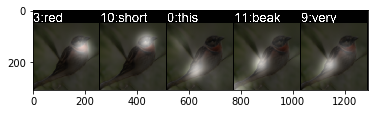

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/example_captions/0_s_0_a0.png', 'r')
imshow(np.asarray(pil_im))

### Attention per word from G2

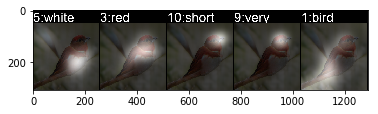

In [0]:
pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/example_captions/0_s_0_a1.png', 'r')
imshow(np.asarray(pil_im))

### Image from G0

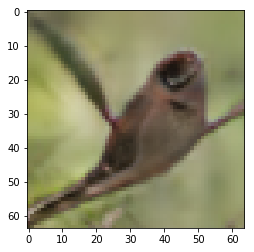

In [0]:
pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/example_captions/0_s_0_g0.png', 'r')
imshow(np.asarray(pil_im))

### Image from G1

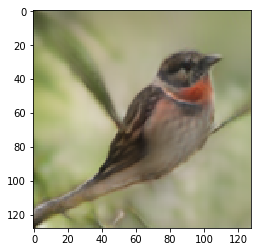

In [0]:

pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/example_captions/0_s_0_g1.png', 'r')
imshow(np.asarray(pil_im))

### Image from G2

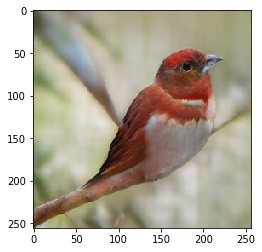

In [0]:

pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/example_captions/0_s_0_g2.png', 'r')
imshow(np.asarray(pil_im))

# Interactive forms

## Interactive image generator (code)

In [0]:
def gen_example1(wordtoix, algo, testing_caption):
    '''generate images from example sentences'''
    from nltk.tokenize import RegexpTokenizer
    #filepath = '%s/example_filenames.txt' % (cfg.DATA_DIR)
    data_dic = {}
    #with open(filepath, "rb") as f:
        #filenames = f.read().decode('utf8').split('\n')
        #for name in filenames:
            #if len(name) == 0:
                #continue
            #filepath = '%s/%s.txt' % (cfg.DATA_DIR, name)
    name = 'testing_caption'
            #with open(filepath, "rb") as f:
                #print('Load from:', name)
                #sentences = f.read().decode('utf8').split('\n')
    sentences = [testing_caption]#.decode('utf8').split('\n')
    # a list of indices for a sentence
    captions = []
    cap_lens = []
    for sent in sentences:
        if len(sent) == 0:
            continue
        sent = sent.replace("\ufffd\ufffd", " ")
        tokenizer = RegexpTokenizer(r'\w+')
        tokens = tokenizer.tokenize(sent.lower())
        if len(tokens) == 0:
            print('sent', sent)
            continue

        rev = []
        for t in tokens:
            t = t.encode('ascii', 'ignore').decode('ascii')
            if len(t) > 0 and t in wordtoix:
                rev.append(wordtoix[t])
        captions.append(rev)
        cap_lens.append(len(rev))
    max_len = np.max(cap_lens)

    sorted_indices = np.argsort(cap_lens)[::-1]
    cap_lens = np.asarray(cap_lens)
    cap_lens = cap_lens[sorted_indices]
    cap_array = np.zeros((len(captions), max_len), dtype='int64')
    for i in range(len(captions)):
        idx = sorted_indices[i]
        cap = captions[idx]
        c_len = len(cap)
        cap_array[i, :c_len] = cap
    key = name[(name.rfind('/') + 1):]
    data_dic[key] = [cap_array, cap_lens, sorted_indices]
    algo.gen_example(data_dic)
    
def GAN_sampler(config, testing_caption, seed):
    cfg_file, gpu_id, data_dir, manualSeed = config_variables(config)
    #args = parse_args()
    #if args.cfg_file is not None:
    if cfg_file is not None:
        # Load config file and merge it with default options
        #cfg_from_file(args.cfg_file)
        cfg_from_file(cfg_file)

    #if args.gpu_id != -1:
    if gpu_id != -1:
        #cfg.GPU_ID = args.gpu_id
        cfg.GPU_ID = gpu_id
    else:
        cfg.CUDA = False

    #if args.data_dir != '':
    if data_dir != '':
        #cfg.DATA_DIR = args.data_dir
        cfg.DATA_DIR = data_dir
    #print('Using config:')
    #pprint.pprint(cfg)

    if not cfg.TRAIN.FLAG:
        #args.manualSeed = 1976
        manualSeed = seed
    #elif args.manualSeed is None:
    elif manualSeed is None:
        #args.manualSeed = random.randint(1, 10000)
        manualSeed = random.randint(1, 10000)
    #random.seed(args.manualSeed)
    #np.random.seed(args.manualSeed)
    #torch.manual_seed(args.manualSeed)
    random.seed(manualSeed)
    np.random.seed(manualSeed)
    torch.manual_seed(manualSeed)
    if cfg.CUDA:
        #torch.cuda.manual_seed_all(args.manualSeed)
        torch.cuda.manual_seed_all(manualSeed)

    now = datetime.datetime.now(dateutil.tz.tzlocal())
    timestamp = now.strftime('%Y_%m_%d_%H_%M_%S')
    output_dir = '../output/%s_%s_%s' % \
        (cfg.DATASET_NAME, cfg.CONFIG_NAME, timestamp)

    split_dir, bshuffle = 'train', True
    if not cfg.TRAIN.FLAG:
        # bshuffle = False
        split_dir = 'test'

    # Get data loader
    imsize = cfg.TREE.BASE_SIZE * (2 ** (cfg.TREE.BRANCH_NUM - 1))
    image_transform = transforms.Compose([
        transforms.Scale(int(imsize * 76 / 64)),
        transforms.RandomCrop(imsize),
        transforms.RandomHorizontalFlip()])
    dataset = TextDataset(cfg.DATA_DIR, split_dir,
                          base_size=cfg.TREE.BASE_SIZE,
                          transform=image_transform)
    assert dataset
    dataloader = torch.utils.data.DataLoader(
        dataset, batch_size=cfg.TRAIN.BATCH_SIZE,
        drop_last=True, shuffle=bshuffle, num_workers=int(cfg.WORKERS))

    # Define models and go to train/evaluate
    algo = trainer(output_dir, dataloader, dataset.n_words, dataset.ixtoword)

    start_t = time.time()
    if cfg.TRAIN.FLAG:
        algo.train()
    else:
        '''generate images from pre-extracted embeddings'''
        if cfg.B_VALIDATION:
            algo.sampling(split_dir)  # generate images for the whole valid dataset
        else:
            gen_example1(dataset.wordtoix, algo, testing_caption)  # generate images for customized captions
    end_t = time.time()
    print('Total time for training:', end_t - start_t)
  

## CUB birds dataset interactive form

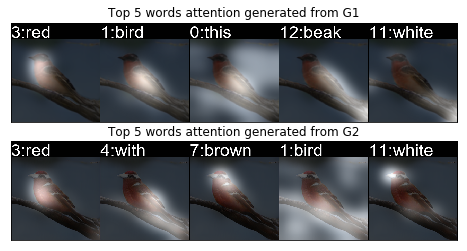

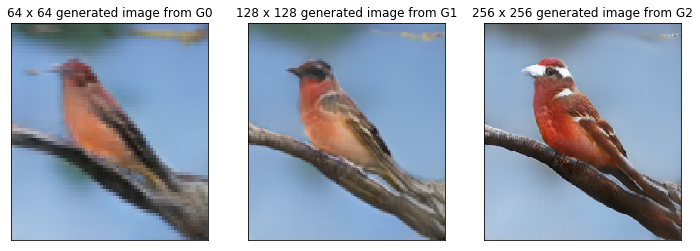

In [0]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#@title Test caption: change text below and run cell to generate new image
test_caption = "This bird is red with white and brown crown and short white beak" #@param {type:"string"}
seed = 210 #@param {type:"integer"}
Random = False #@param {type:"boolean"}
if Random:
  seed = random.randint(1, 10000)

config_id = 3
GAN_sampler(configurations[config_id], test_caption, seed)
clear_output()
f, axarr1 = plt.subplots(2,1, figsize=(8, 4))
pil_im = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/testing_caption/0_s_0_a0.png', 'r')
axarr1[0].imshow(np.asarray(pil_im), interpolation='nearest', aspect='auto')
axarr1[0].title.set_text('Top 5 words attention generated from G1')
axarr1[0].axes.get_xaxis().set_visible(False)
axarr1[0].axes.get_yaxis().set_visible(False)

pil_im0 = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/testing_caption/0_s_0_a1.png', 'r')
axarr1[1].imshow(np.asarray(pil_im0), interpolation='nearest', aspect='auto')
axarr1[1].title.set_text('Top 5 words attention generated from G2')
axarr1[1].axes.get_xaxis().set_visible(False)
axarr1[1].axes.get_yaxis().set_visible(False)
plt.show()

f, axarr2 = plt.subplots(1, 3, figsize=(12, 4))

pil_im1 = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/testing_caption/0_s_0_g0.png', 'r')
axarr2[0].imshow(np.asarray(pil_im1), interpolation='nearest', aspect='auto')
axarr2[0].title.set_text('64 x 64 generated image from G0')
axarr2[0].axes.get_xaxis().set_visible(False)
axarr2[0].axes.get_yaxis().set_visible(False)

pil_im2 = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/testing_caption/0_s_0_g1.png', 'r')
axarr2[1].imshow(np.asarray(pil_im2), interpolation='nearest', aspect='auto')
axarr2[1].title.set_text('128 x 128 generated image from G1')
axarr2[1].axes.get_xaxis().set_visible(False)
axarr2[1].axes.get_yaxis().set_visible(False)

pil_im3 = Image.open('/content/AttnGAN-master/models/bird_AttnGAN2/testing_caption/0_s_0_g2.png', 'r')
axarr2[2].imshow(np.asarray(pil_im3), interpolation='nearest', aspect='auto')
axarr2[2].title.set_text('256 x 256 generated image from G2')
axarr2[2].axes.get_xaxis().set_visible(False)
axarr2[2].axes.get_yaxis().set_visible(False)
plt.show()

## i-CLEVR interactive form (using pre-trained AttnGAN with 2 GANs and 100 epoch)

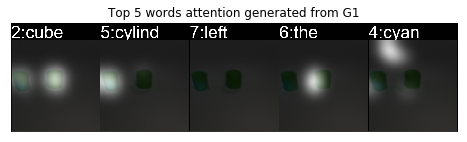

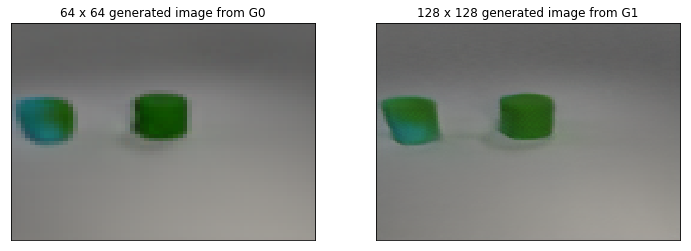

In [0]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#@title Test caption: change text below and run cell to generate new image
test_caption = "add purple cube and add cyan cylinder to the right" #@param {type:"string"}
seed = 300 #@param {type:"integer"}
Random = False #@param {type:"boolean"}
if Random:
  seed = random.randint(1, 10000)

config_id = 7
GAN_sampler(configurations[config_id], test_caption, seed)
clear_output()
f, axarr1 = plt.subplots(1,1, figsize=(8, 2))
pil_im = Image.open('/content/AttnGAN-master/models/netG_epoch_100/testing_caption/0_s_0_a0.png', 'r')
axarr1.imshow(np.asarray(pil_im), interpolation='nearest', aspect='auto')
axarr1.title.set_text('Top 5 words attention generated from G1')
axarr1.axes.get_xaxis().set_visible(False)
axarr1.axes.get_yaxis().set_visible(False)

# pil_im0 = Image.open('/content/AttnGAN-master/models/netG_epoch_100/testing_caption/0_s_0_a1.png', 'r')
# axarr1[1].imshow(np.asarray(pil_im0), interpolation='nearest', aspect='auto')
# axarr1[1].title.set_text('Top 5 words attention generated from G2')
# axarr1[1].axes.get_xaxis().set_visible(False)
# axarr1[1].axes.get_yaxis().set_visible(False)
# plt.show()

f, axarr2 = plt.subplots(1, 2, figsize=(12, 4))

pil_im1 = Image.open('/content/AttnGAN-master/models/netG_epoch_100/testing_caption/0_s_0_g0.png', 'r')
axarr2[0].imshow(np.asarray(pil_im1), interpolation='nearest', aspect='auto')
axarr2[0].title.set_text('64 x 64 generated image from G0')
axarr2[0].axes.get_xaxis().set_visible(False)
axarr2[0].axes.get_yaxis().set_visible(False)

pil_im2 = Image.open('/content/AttnGAN-master/models/netG_epoch_100/testing_caption/0_s_0_g1.png', 'r')
axarr2[1].imshow(np.asarray(pil_im2), interpolation='nearest', aspect='auto')
axarr2[1].title.set_text('128 x 128 generated image from G1')
axarr2[1].axes.get_xaxis().set_visible(False)
axarr2[1].axes.get_yaxis().set_visible(False)

# pil_im3 = Image.open('/content/AttnGAN-master/models/netG_epoch_100/testing_caption/0_s_0_g2.png', 'r')
# axarr2[2].imshow(np.asarray(pil_im3), interpolation='nearest', aspect='auto')
# axarr2[2].title.set_text('256 x 256 generated image from G2')
# axarr2[2].axes.get_xaxis().set_visible(False)
# axarr2[2].axes.get_yaxis().set_visible(False)
# plt.show()

## i-CLEVR interactive form (using pre-trained AttnGAN with 3 GANs and 25 epoch)

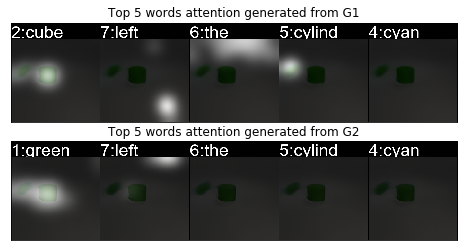

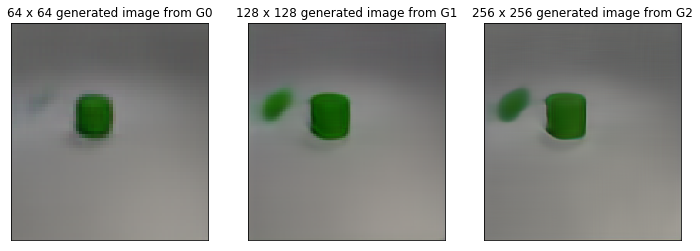

In [0]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#@title Test caption: change text below and run cell to generate new image
test_caption = "add green cube and add cyan cylinder to the left" #@param {type:"string"}
seed = 20 #@param {type:"integer"}
Random = False #@param {type:"boolean"}
if Random:
  seed = random.randint(1, 10000)

config_id = 8
GAN_sampler(configurations[config_id], test_caption, seed)
clear_output()
f, axarr1 = plt.subplots(2,1, figsize=(8, 4))
pil_im = Image.open('/content/AttnGAN-master/models/netG_epoch_25/testing_caption/0_s_0_a0.png', 'r')
axarr1[0].imshow(np.asarray(pil_im), interpolation='nearest', aspect='auto')
axarr1[0].title.set_text('Top 5 words attention generated from G1')
axarr1[0].axes.get_xaxis().set_visible(False)
axarr1[0].axes.get_yaxis().set_visible(False)

pil_im0 = Image.open('/content/AttnGAN-master/models/netG_epoch_25/testing_caption/0_s_0_a1.png', 'r')
axarr1[1].imshow(np.asarray(pil_im0), interpolation='nearest', aspect='auto')
axarr1[1].title.set_text('Top 5 words attention generated from G2')
axarr1[1].axes.get_xaxis().set_visible(False)
axarr1[1].axes.get_yaxis().set_visible(False)
plt.show()

f, axarr2 = plt.subplots(1, 3, figsize=(12, 4))

pil_im1 = Image.open('/content/AttnGAN-master/models/netG_epoch_25/testing_caption/0_s_0_g0.png', 'r')
axarr2[0].imshow(np.asarray(pil_im1), interpolation='nearest', aspect='auto')
axarr2[0].title.set_text('64 x 64 generated image from G0')
axarr2[0].axes.get_xaxis().set_visible(False)
axarr2[0].axes.get_yaxis().set_visible(False)

pil_im2 = Image.open('/content/AttnGAN-master/models/netG_epoch_25/testing_caption/0_s_0_g1.png', 'r')
axarr2[1].imshow(np.asarray(pil_im2), interpolation='nearest', aspect='auto')
axarr2[1].title.set_text('128 x 128 generated image from G1')
axarr2[1].axes.get_xaxis().set_visible(False)
axarr2[1].axes.get_yaxis().set_visible(False)

pil_im3 = Image.open('/content/AttnGAN-master/models/netG_epoch_25/testing_caption/0_s_0_g2.png', 'r')
axarr2[2].imshow(np.asarray(pil_im3), interpolation='nearest', aspect='auto')
axarr2[2].title.set_text('256 x 256 generated image from G2')
axarr2[2].axes.get_xaxis().set_visible(False)
axarr2[2].axes.get_yaxis().set_visible(False)
plt.show()